# Import Packages and Define Functions

In [6]:
# Load required packages
import math
import itertools
import matplotlib.gridspec as gridspec
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pandas as pd
import glob
import statistics as stats
import pandas as pd
import pickle
from scipy import signal
import scipy
import seaborn as sns

from chart_studio import plotly as py
import plotly.graph_objs as go
import plotly.offline as pyo

import plotly.figure_factory as ff

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from scipy.signal import find_peaks

import datetime
import h5py
from scipy.stats import pearsonr   
from tqdm.auto import tqdm
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
import traceback
from matplotlib import pyplot as plt, cm
from matplotlib import colors
import hdf5plugin
import pickle
%matplotlib inline

print("All packages imported!")

All packages imported!


In [7]:
def plot_candidates(hf1,hf2,hf3,hf4,hf5,hf6,lower,upper,file_ON,foff,fch1):
    obs1 = np.squeeze(hf1['data'][:,:,lower:upper],axis=1)
    obs2 = np.squeeze(hf2['data'][:,:,lower:upper],axis=1)
    obs3 = np.squeeze(hf3['data'][:,:,lower:upper],axis=1)
    obs4 = np.squeeze(hf4['data'][:,:,lower:upper],axis=1)
    obs5 = np.squeeze(hf5['data'][:,:,lower:upper],axis=1)
    obs6 = np.squeeze(hf6['data'][:,:,lower:upper],axis=1)

    print(obs1)

    cadence_max = np.max([np.max(obs1),np.max(obs2),np.max(obs3),np.max(obs4),np.max(obs5),np.max(obs6)])
    
    obs1_values = (obs1/cadence_max).flatten()
    obs2_values = (obs2/cadence_max).flatten()
    obs3_values = (obs3/cadence_max).flatten()
    obs4_values = (obs4/cadence_max).flatten()
    obs5_values = (obs5/cadence_max).flatten()
    obs6_values = (obs6/cadence_max).flatten()


    k1 = scipy.stats.kurtosis(obs1_values)
    k2 = scipy.stats.kurtosis(obs2_values)
    k3 = scipy.stats.kurtosis(obs3_values)
    k4 = scipy.stats.kurtosis(obs4_values)
    k5 = scipy.stats.kurtosis(obs5_values)
    k6 = scipy.stats.kurtosis(obs6_values)


    obs1 = obs1/np.max(obs1)
    obs2 = obs2/np.max(obs2)
    obs3 = obs3/np.max(obs3)
    obs4 = obs4/np.max(obs4)
    obs5 = obs5/np.max(obs5)
    obs6 = obs6/np.max(obs6)



    full_cadence = np.squeeze([np.concatenate((obs1,obs2,obs3,obs4,obs5,obs6))])


    # plot the waterfall
    fig, axs = plt.subplots(6,figsize=(5, 7))
    axs[0].imshow(obs1,aspect='auto',extent=[-(2048*foff*10**3),(2048*foff*10**3),300,0])
    axs[1].imshow(obs2,aspect='auto',extent=[-(2048*foff*10**3),(2048*foff*10**3),300,0])
    axs[2].imshow(obs3,aspect='auto',extent=[-(2048*foff*10**3),(2048*foff*10**3),300,0])
    axs[3].imshow(obs4,aspect='auto',extent=[-(2048*foff*10**3),(2048*foff*10**3),300,0])
    axs[4].imshow(obs5,aspect='auto',extent=[-(2048*foff*10**3),(2048*foff*10**3),300,0])
    axs[5].imshow(obs6,aspect='auto',extent=[-(2048*foff*10**3),(2048*foff*10**3),300,0])
    plt.subplots_adjust(hspace=0)
    center_freq = fch1+foff*(lower)    
    name = file_ON.split('/')[-1]
    name = name.split("_")[2:]
    plt.suptitle(' '.join(name),fontsize=10)
    plt.xlabel(f"Relative Frequency [kHz] from {fch1-2048*np.round(-foff,9)} Mhz")
    plt.ylabel("Time [s]")
    plt.show()


    
    # broadband
    # obs1_int_freq = obs1.sum(axis=1)
    # obs1_int_freq = obs1_int_freq/np.max(obs1_int_freq)
    # plt.plot(obs1_int_freq)
    # snr, threshold_freq = get_snr(obs1_int_freq,SIGNIFICANCE_LEVEL)
    # print("broadband",snr)
    # plt.title("Freq integrated")
    # plt.axhline(y=threshold_freq)
    # plt.show()


    # different rows of first ON
    # snr, threshold2 = get_snr(obs1[-2],SIGNIFICANCE_LEVEL)
    # plt.axhline(y=threshold2)
    # plt.plot(obs1[-2]/np.max(obs1[-2]))
    # plt.title("Second last row Obs1")
    # plt.show()
    # plt.plot(obs1[-1]/np.max(obs1[-1]))
    # snr, threshold = get_snr(obs1[-1],SIGNIFICANCE_LEVEL)
    # plt.axhline(y=threshold)
    # plt.title("last row Obs1")
    # plt.show()
    # plt.plot(obs2[0]/np.max(obs2[0]))
    # plt.title("first row Obs2")
    # plt.show()
    
    # plt.plot(obs2[-1]/np.max(obs2[-1]))
    # plt.title("Last row Obs2")
    # plt.show()


    # plt.plot(obs3[8]/np.max(obs3[8]))
    # plt.title("first row Obs3")
    # plt.show()

    # plt.plot(obs6[-5]/np.max(obs5[-1]))
    # plt.title("last row Obs5")
    # plt.show()




    
    # obs1_int = obs1.sum(axis=0)


    # obs2_int = obs2.sum(axis=0)
    # obs3_int = obs3.sum(axis=0)

    # obs4_int = obs4.sum(axis=0)

    # obs5_int = obs5.sum(axis=0)

    # obs6_int = obs6.sum(axis=0)


    # entire_cadence = obs1_int+obs2_int+obs3_int+obs4_int+obs5_int+obs6_int
    # all_values = np.concatenate((obs1,obs2,obs3,obs4,obs5,obs6))
    # print(all_values)
    # entire_cadence = entire_cadence/ np.max(entire_cadence)
    # snr, threshold = get_snr(entire_cadence,SIGNIFICANCE_LEVEL)
    # plt.axhline(y=threshold)

    # plt.plot(entire_cadence)                
    # number_above = (entire_cadence > threshold).sum()
    # print('#:',number_above)
    # plt.show()

    # plt.plot(obs5_int)                
    # print('obs5_int')
    # plt.show()

    # plt.plot(obs5[-1])
    # plt.show()

    # zero_drift = drift_index_checker(obs5_int, obs5[-1],10)


    # # kurtosis
    # all_freq_values = all_values.flatten()
    # plt.title("entire cadence")
    # plt.hist(all_freq_values, bins=50)
    # plt.yscale("log")
    # plt.show()
    # plt.title("obs1")
    # plt.hist(obs1_values, bins=50)
    # plt.yscale("log")
    # plt.show()
    # k1 = scipy.stats.kurtosis(obs1_values)
    # print("kurtosis:",k1)

    # plt.title("obs2")
    # plt.hist(obs2_values, bins=50)
    # plt.yscale("log")
    # plt.show()
    # k2 = scipy.stats.kurtosis(obs2_values)
    # print("kurtosis:",k2)

    # plt.title("obs3")
    # plt.hist(obs3_values, bins=50)
    # plt.yscale("log")
    # plt.show()
    # k3 = scipy.stats.kurtosis(obs3_values)
    # print("kurtosis:",k3)

    # plt.title("obs4")
    # plt.hist(obs4_values, bins=50)
    # plt.yscale("log")
    # plt.show()
    # k4 = scipy.stats.kurtosis(obs4_values)
    # print("kurtosis:",k4)

    # plt.title("obs5")
    # plt.hist(obs5_values, bins=50)
    # plt.yscale("log")
    # plt.show()
    # k5 = scipy.stats.kurtosis(obs5_values)
    # print("kurtosis:",k5)

    # plt.title("obs6")
    # plt.hist(obs6_values, bins=50)
    # plt.yscale("log")
    # plt.show()
    # print("kurtosis:",k6)

    # k_score = (k1+k3+k5)/(k2+k4+k6)
    # print("K score:", k_score)


    # obs1_freq_int = obs1.sum(axis=1)
    # obs2_freq_int = obs2.sum(axis=1)
    # obs3_freq_int = obs3.sum(axis=1)
    # obs4_freq_int = obs4.sum(axis=1)
    # obs5_freq_int = obs5.sum(axis=1)
    # obs6_freq_int = obs6.sum(axis=1)

    
    # # timewise kurtosis
    # plt.title("obs1")
    # plt.hist(obs1_freq_int, bins=50)
    # plt.yscale("log")
    # plt.show()
    # print("time_kurtosis:",k1)

    # plt.title("obs2")
    # plt.hist(obs2_freq_int, bins=50)
    # plt.yscale("log")
    # plt.show()
    # k2 = scipy.stats.kurtosis(obs2_values)
    # print("kurtosis:",k2)

    # plt.title("obs3")
    # plt.hist(obs3_freq_int, bins=50)
    # plt.yscale("log")
    # plt.show()
    # k3 = scipy.stats.kurtosis(obs3_values)
    # print("kurtosis:",k3)

    # plt.title("obs4")
    # plt.hist(obs4_freq_int, bins=50)
    # plt.yscale("log")
    # plt.show()
    # k4 = scipy.stats.kurtosis(obs4_values)
    # print("kurtosis:",k4)

    # plt.title("obs5")
    # plt.hist(obs5_freq_int, bins=50)
    # plt.yscale("log")
    # plt.show()
    # k5 = scipy.stats.kurtosis(obs5_values)
    # print("kurtosis:",k5)

    # plt.title("obs6")
    # plt.hist(obs6_freq_int, bins=50)
    # plt.yscale("log")
    # plt.show()


    
    # # drift_index_checker(entire_cadence, obs1[-1])


    # obsoff = np.squeeze(hf2['data'][:,:,lower-EDGE:upper+EDGE],axis=1)

    
    # # obs2 = np.squeeze(hf2['data'][:,:,lower:upper],axis=1)

    # print(len(obsoff),len(obs1))
    # print(obs2)
    # print(EDGE)
    # print(obsoff)
    # max_corr,current_shift = pearson_slider(obs1[-1],obsoff[0])
    # print("max corr",max_corr)


    # snr_obs3_0, threshold_3_0 = get_snr(obs3[0],SIGNIFICANCE_LEVEL)
    # snr_obs3_16, threshold_3_16 = get_snr(obs3[-1],SIGNIFICANCE_LEVEL)
    # snr_obs5_0, threshold_5_0 = get_snr(obs5[0],SIGNIFICANCE_LEVEL)
    # snr_obs5_16, threshold_5_16 = get_snr(obs5[-1],SIGNIFICANCE_LEVEL)

    # print(snr_obs3_0,snr_obs3_16,snr_obs5_0,snr_obs5_16)

    # plt.title("obs3")
    # plt.plot(obs3[0]/np.max(obs3[0]))
    # plt.axhline(y=threshold_3_0)
    # plt.show()
    # plt.plot(obs3[-1]/np.max(obs3[-1]))
    # plt.axhline(y=threshold_3_16)
    # plt.show()
    # plt.title("obs5")

    # plt.plot(obs5[0]/np.max(obs5[0]))
    # plt.axhline(y=threshold_5_0)
    # plt.show()
    # plt.plot(obs5[-1]/np.max(obs5[-1]))
    # plt.axhline(y=threshold_5_16)
    # plt.show()



    
    return k_score

def filter_zero_drift(obs1,obs2,obs3,obs4,obs5,obs6,filtering_level):
    # checking if there are lots of zero drift signals in OFF observations, or ON and OFF observations
        
    # plot the integrated frequency
    obs1_int = obs1.sum(axis=0)
    obs2_int = obs2.sum(axis=0)
    obs3_int = obs3.sum(axis=0)
    obs4_int = obs4.sum(axis=0)
    obs5_int = obs5.sum(axis=0)
    obs6_int = obs6.sum(axis=0)

    obs_sums = [obs1_int,obs2_int,obs3_int,obs4_int,obs5_int,obs6_int]


    whole_sum = obs1_int+obs2_int+obs3_int+obs4_int+obs5_int+obs6_int
    off_sum = [obs2_int,obs4_int,obs6_int]
        
    on_sum_list = [obs1_int,obs3_int,obs5_int]
    on_sum_sum = obs1_int+obs3_int+obs5_int

    if filtering_level < 3:
        whole_sum = off_sum

    all_peaks = []
    all_peak_freqs = []

    for i,obs_int in enumerate(on_sum_list):
        obs_data = obs_int/np.max(obs_int)
        sigma_mult = scipy.stats.median_abs_deviation(obs_data)
        peaks, properties = find_peaks(obs_data, prominence=10*sigma_mult, width=1,distance=10)
        freqs = np.arange(0,len(whole_sum),1)

        all_peak_freqs.append(freqs[peaks])
        # plt.plot(freqs,obs_data)
        # plt.scatter(freqs[peaks],obs_data[peaks],color='orange',s=50)
        # plt.show()

    for i,obs_int in enumerate([on_sum_sum]):
        obs_data = obs_int/np.max(obs_int)
        sigma_mult = scipy.stats.median_abs_deviation(obs_data)
        peaks, properties = find_peaks(obs_data, prominence=10*sigma_mult, width=1,distance=10)
        freqs = np.arange(0,len(whole_sum),1)

        all_peaks.append(len(peaks))

        # plt.plot(freqs,obs_data)
        # plt.scatter(freqs[peaks],obs_data[peaks],color='orange',s=50)
        # plt.show()

    peak_drift_1 = []
    peak_drift_2 = []
    peak_drift_3 = []
    print('peaks',all_peak_freqs[0],all_peak_freqs[1],all_peak_freqs[2])


    if len(all_peak_freqs[1]) != 0:
        peak_drift_1 = find_closest_elements(all_peak_freqs[0],all_peak_freqs[1])
    if len(all_peak_freqs[2]) != 0:
        peak_drift_2 = find_closest_elements(all_peak_freqs[1],all_peak_freqs[2])
    if len(all_peak_freqs[2]) != 0:
        peak_drift_3 = find_closest_elements(all_peak_freqs[0],all_peak_freqs[2])


    return all_peaks[-1], peak_drift_1,peak_drift_2,peak_drift_3

def find_closest_elements(a, b):
    result = []
    
    for element_a in a:
        closest_element_b = min(b, key=lambda x: abs(x - element_a))
        difference = abs(element_a - closest_element_b)
        result.append(difference)
    
    return result

def plot_candidates_sparse(hf1,hf2,hf3,hf4,hf5,hf6,lower,upper,file_ON,foff,fch1,block_size,batch_info,ax,parent_grid,position,buffer):
    obs1 = np.squeeze(hf1['data'][:,:,lower:upper],axis=1)
    obs2 = np.squeeze(hf2['data'][:,:,lower:upper],axis=1)
    obs3 = np.squeeze(hf3['data'][:,:,lower:upper],axis=1)
    obs4 = np.squeeze(hf4['data'][:,:,lower:upper],axis=1)
    obs5 = np.squeeze(hf5['data'][:,:,lower:upper],axis=1)
    obs6 = np.squeeze(hf6['data'][:,:,lower:upper],axis=1)

    cadence_max = np.max([np.max(obs1),np.max(obs2),np.max(obs3),np.max(obs4),np.max(obs5),np.max(obs6)])
    
    obs1_values = (obs1/cadence_max).flatten()
    obs2_values = (obs2/cadence_max).flatten()
    obs3_values = (obs3/cadence_max).flatten()
    obs4_values = (obs4/cadence_max).flatten()
    obs5_values = (obs5/cadence_max).flatten()
    obs6_values = (obs6/cadence_max).flatten()


    k1 = scipy.stats.kurtosis(obs1_values)
    k2 = scipy.stats.kurtosis(obs2_values)
    k3 = scipy.stats.kurtosis(obs3_values)
    k4 = scipy.stats.kurtosis(obs4_values)
    k5 = scipy.stats.kurtosis(obs5_values)
    k6 = scipy.stats.kurtosis(obs6_values)


    # plt.hist(obs2_values)
    # # plt.yscale('log')
    # plt.title(k2)
    # plt.show()
    # plt.hist(obs4_values)
    # # plt.yscale('log')
    # plt.title(k4)
    # plt.show()
    # plt.hist(obs6_values)
    # # plt.yscale('log')
    # plt.title(k4)
    # plt.show()



    obs1 = obs1/np.max(obs1)
    obs2 = obs2/np.max(obs2)
    obs3 = obs3/np.max(obs3)
    obs4 = obs4/np.max(obs4)
    obs5 = obs5/np.max(obs5)
    obs6 = obs6/np.max(obs6)

    obs1_summed = np.sum(obs1, axis=1)
    obs3_summed = np.sum(obs3, axis=1)
    obs5_summed = np.sum(obs4, axis=1)

    # plt.plot(obs1_summed)
    # plt.show()
    # plt.plot(obs3_summed)
    # plt.show()
    # plt.plot(obs5_summed)
    # plt.show()

    


    full_cadence = np.squeeze([np.concatenate((obs1,obs2,obs3,obs4,obs5,obs6))])

    # check for zero drift

    constant_peaks,peak_drift_1,peak_drift_2,peak_drift_3 = filter_zero_drift(obs1,obs2,obs3,obs4,obs5,obs6,3)
    peak_drift_1= abs(np.array(peak_drift_1))
    peak_drift_2 = abs(np.array(peak_drift_2))
    peak_drift_3 = abs(np.array(peak_drift_3))

    print(peak_drift_1,peak_drift_2,peak_drift_3)
    drifting = True
    if np.any(peak_drift_1 < 3) or np.any(peak_drift_2 < 3) or np.any(peak_drift_3 < 7):
        drifting = False
        print("NOT DRIFING")
    else:
        pass

    # # plot the waterfall
    # if drifting == False:
    #     fig, axs = plt.subplots(6,figsize=(5, 7), facecolor='red')
    # else:
    #     fig, axs = plt.subplots(6,figsize=(5, 7), facecolor='limegreen')

    
    
    center_freq = fch1+foff*(lower)    
    name = file_ON.split('/')[-1]

    target = name.split("_")[-2]
    if target == 'OFF':
        target = name.split("_")[-3]
    obs_num = name.split("_")[-1]
    MJD = name.split("_")[4]
    node = name.split("_")[0]

    # axs[0].imshow(obs1,aspect='auto',extent=[-((block_size/2)*foff*10**3),((block_size/2)*foff*10**3),299,0],norm=colors.LogNorm(),cmap='afmhot')
    # axs[1].imshow(obs2,aspect='auto',extent=[-((block_size/2)*foff*10**3),((block_size/2)*foff*10**3),299,0],norm=colors.LogNorm(),cmap='afmhot')
    # axs[2].imshow(obs3,aspect='auto',extent=[-((block_size/2)*foff*10**3),((block_size/2)*foff*10**3),299,0],norm=colors.LogNorm(),cmap='afmhot')
    # axs[3].imshow(obs4,aspect='auto',extent=[-((block_size/2)*foff*10**3),((block_size/2)*foff*10**3),299,0],norm=colors.LogNorm(),cmap='afmhot')
    # axs[4].imshow(obs5,aspect='auto',extent=[-((block_size/2)*foff*10**3),((block_size/2)*foff*10**3),299,0],norm=colors.LogNorm(),cmap='afmhot')
    # axs[5].imshow(obs6,aspect='auto',extent=[-((block_size/2)*foff*10**3),((block_size/2)*foff*10**3),299,0],norm=colors.LogNorm(),cmap='afmhot')
    # plt.subplots_adjust(hspace=0)

    # axs[0].tick_params(axis='y', labelsize=12)
    # axs[1].tick_params(axis='y', labelsize=12)
    # axs[2].tick_params(axis='y', labelsize=12)
    # axs[3].tick_params(axis='y', labelsize=12)
    # axs[4].tick_params(axis='y', labelsize=12)
    # axs[5].tick_params(axis='y', labelsize=12)

    # axs[0].set_ylabel("Time [s]",fontsize=12)
    # axs[1].set_ylabel("Time [s]",fontsize=12)
    # axs[2].set_ylabel("Time [s]",fontsize=12)
    # axs[3].set_ylabel("Time [s]",fontsize=12)
    # axs[4].set_ylabel("Time [s]",fontsize=12)
    # axs[5].set_ylabel("Time [s]",fontsize=12)

    # axs[0].set_title(f"Target: {target} -- MJD: {MJD} -- Node: {node}",fontsize=10)

    # axs[5].tick_params(axis='x', labelsize=12)

    # plt.xlabel(f"Rel. Freq. [kHz] from {np.round(center_freq,5)} Mhz",fontsize=15)


    # plt.annotate(f'lower,upper: {(lower,upper)} ---- batch info: {batch_info}', (0,0), (0, -50), xycoords='axes fraction', textcoords='offset points', va='top',fontsize=6)
    # # fig.supylabel("Time [s]",fontsize=15)
    # plt.show()



    obs_list = [obs1, obs2, obs3, obs4, obs5, obs6]
    group_grid = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=parent_grid[position])
    ax = plt.subplot(group_grid[0])
    
    # Now, instead of creating a new figure, use the provided axes to plot
    # We mimic creating 6 subplots vertically within this single subplot area
    inner_grid = gridspec.GridSpecFromSubplotSpec(6, 1, subplot_spec=group_grid[0], hspace=0)
    
    for i in range(6):
        ax = plt.subplot(inner_grid[i])
        ax.imshow(obs_list[i], aspect='auto', extent=[-((block_size/2)*foff*10**3), ((block_size/2)*foff*10**3), 299, 0], norm=colors.LogNorm(), cmap='afmhot')
        ax.set_ylabel("Time [s]", fontsize=6)
        if i == 0:
            ax.set_title(f"Target: {target} -- MJD: {MJD} -- Node: {node}", fontsize=10)  # Update with dynamic title if needed
        if i == 5:
            ax.set_xlabel(f"Rel. Freq. [kHz] from {np.round(center_freq,5)} Mhz",fontsize=10)
            ax.annotate(f'File: {name}', (0,0), (400, 500), xycoords='axes fraction', textcoords='offset points', va='top',rotation='vertical',fontsize=12)
            ax.annotate(f'lower,upper: {(lower,upper)} ---- batch info: {batch_info}', (0,0), (415, 500), xycoords='axes fraction',rotation='vertical', textcoords='offset points', va='top',fontsize=12)
        ax.tick_params(axis='y', labelsize=6)
        ax.axvline(x=-((block_size/2-(buffer-50))*foff*10**3),linewidth=1,linestyle='--',color='white')
        ax.axvline(x=((block_size/2-(buffer-50))*foff*10**3),linewidth=1,linestyle='--',color='white')



In [8]:
def plot_candidates_speed(hf1,hf2,hf3,hf4,hf5,hf6,lower,upper,file_ON,foff,fch1,block_size,section_block):
    obs1 = hf1[:,lower:upper]
    obs2 = hf2[:,lower:upper]
    obs3 = hf3[:,lower:upper]
    obs4 = hf4[:,lower:upper]
    obs5 = hf5[:,lower:upper] 
    obs6 = hf6[:,lower:upper]

    row_ON = hf1[-1,lower:upper]
    print(row_ON)

    print(obs1)
    cadence_max = np.max([np.max(obs1),np.max(obs2),np.max(obs3),np.max(obs4),np.max(obs5),np.max(obs6)])
    
    obs1_values = (obs1/cadence_max).flatten()
    obs2_values = (obs2/cadence_max).flatten()
    obs3_values = (obs3/cadence_max).flatten()
    obs4_values = (obs4/cadence_max).flatten()
    obs5_values = (obs5/cadence_max).flatten()
    obs6_values = (obs6/cadence_max).flatten()


    k1 = scipy.stats.kurtosis(obs1_values)
    k2 = scipy.stats.kurtosis(obs2_values)
    k3 = scipy.stats.kurtosis(obs3_values)
    k4 = scipy.stats.kurtosis(obs4_values)
    k5 = scipy.stats.kurtosis(obs5_values)
    k6 = scipy.stats.kurtosis(obs6_values)

    print("On Ks:",k1,k3,k5)
    print("OFF Ks:",k2,k4,k6)
    print('k_score:', np.median([k1,k3,k5])*np.min([k1,k3,k5])**2)

    print("different k_score",(np.median([k1,k3,k5])**2)*np.max([k1,k3,k5]))
    plt.hist(obs2_values)
    # plt.yscale('log')
    plt.title(k2)
    plt.show()
    plt.hist(obs4_values)
    # plt.yscale('log')
    plt.title(k4)
    plt.show()
    plt.hist(obs6_values)
    # plt.yscale('log')
    plt.title(k4)
    plt.show()



    obs1 = obs1/np.max(obs1)
    obs2 = obs2/np.max(obs2)
    obs3 = obs3/np.max(obs3)
    obs4 = obs4/np.max(obs4)
    obs5 = obs5/np.max(obs5)
    obs6 = obs6/np.max(obs6)

    obs1_summed = np.sum(obs1, axis=1)
    obs3_summed = np.sum(obs3, axis=1)
    obs5_summed = np.sum(obs4, axis=1)

    plt.plot(obs1_summed)
    plt.show()
    plt.plot(obs3_summed)
    plt.show()
    plt.plot(obs5_summed)
    plt.show()

    


    full_cadence = np.squeeze([np.concatenate((obs1,obs2,obs3,obs4,obs5,obs6))])

    # check for zero drift

    constant_peaks,peak_drift_1,peak_drift_2 = filter_zero_drift(obs1,obs2,obs3,obs4,obs5,obs6,3)
    print('constant peaks #: ',constant_peaks)
    peak_drift_1= abs(np.array(peak_drift_1))
    peak_drift_2 = abs(np.array(peak_drift_2))

    drifting = True
    print(peak_drift_1,peak_drift_2)
    if np.any(peak_drift_1 < 3) or np.any(peak_drift_2 < 3):
        print("Not drifting")
        drifting = False
    else:
        print("Drifting")


    # plot the waterfall
    if drifting == False:
        fig, axs = plt.subplots(6,figsize=(5, 7), facecolor='red')
    else:
        fig, axs = plt.subplots(6,figsize=(5, 7), facecolor='limegreen')

    
    axs[0].imshow(obs1,aspect='auto',extent=[-((block_size/2)*foff*10**3),((block_size/2)*foff*10**3),299,0],norm=colors.LogNorm(),cmap='afmhot')
    axs[1].imshow(obs2,aspect='auto',extent=[-((block_size/2)*foff*10**3),((block_size/2)*foff*10**3),299,0],norm=colors.LogNorm(),cmap='afmhot')
    axs[2].imshow(obs3,aspect='auto',extent=[-((block_size/2)*foff*10**3),((block_size/2)*foff*10**3),299,0],norm=colors.LogNorm(),cmap='afmhot')
    axs[3].imshow(obs4,aspect='auto',extent=[-((block_size/2)*foff*10**3),((block_size/2)*foff*10**3),299,0],norm=colors.LogNorm(),cmap='afmhot')
    axs[4].imshow(obs5,aspect='auto',extent=[-((block_size/2)*foff*10**3),((block_size/2)*foff*10**3),299,0],norm=colors.LogNorm(),cmap='afmhot')
    axs[5].imshow(obs6,aspect='auto',extent=[-((block_size/2)*foff*10**3),((block_size/2)*foff*10**3),299,0],norm=colors.LogNorm(),cmap='afmhot')
    plt.subplots_adjust(hspace=0)
    center_freq = fch1+foff*(lower+section_block*block_size)    
    name = file_ON.split('/')[-1]

    target = name.split("_")[-2]
    obs_num = name.split("_")[-1]
    MJD = name.split("_")[4]
    node = name.split("_")[0]

    axs[0].tick_params(axis='y', labelsize=12)
    axs[1].tick_params(axis='y', labelsize=12)
    axs[2].tick_params(axis='y', labelsize=12)
    axs[3].tick_params(axis='y', labelsize=12)
    axs[4].tick_params(axis='y', labelsize=12)
    axs[5].tick_params(axis='y', labelsize=12)

    axs[0].set_ylabel("Time [s]",fontsize=12)
    axs[1].set_ylabel("Time [s]",fontsize=12)
    axs[2].set_ylabel("Time [s]",fontsize=12)
    axs[3].set_ylabel("Time [s]",fontsize=12)
    axs[4].set_ylabel("Time [s]",fontsize=12)
    axs[5].set_ylabel("Time [s]",fontsize=12)

    axs[0].set_title(f"Target: {target} -- MJD: {MJD} -- Node: {node}",fontsize=10)

    axs[5].tick_params(axis='x', labelsize=12)

    plt.xlabel(f"Rel. Freq. [kHz] from {np.round(center_freq,5)} Mhz",fontsize=15)
    # fig.supylabel("Time [s]",fontsize=15)
    plt.show()


In [9]:
def plot_waterfall(obs1,obs2,obs3,obs4,obs5,obs6,fch1,foff,lower,upper,file_ON,block_size):
    fig, axs = plt.subplots(6,figsize=(5, 7))
    axs[0].imshow(obs1,aspect='auto',extent=[-((block_size/2)*foff*10**3),((block_size/2)*foff*10**3),299,0],norm=colors.LogNorm(),cmap='afmhot')
    axs[1].imshow(obs2,aspect='auto',extent=[-((block_size/2)*foff*10**3),((block_size/2)*foff*10**3),299,0],norm=colors.LogNorm(),cmap='afmhot')
    axs[2].imshow(obs3,aspect='auto',extent=[-((block_size/2)*foff*10**3),((block_size/2)*foff*10**3),299,0],norm=colors.LogNorm(),cmap='afmhot')
    axs[3].imshow(obs4,aspect='auto',extent=[-((block_size/2)*foff*10**3),((block_size/2)*foff*10**3),299,0],norm=colors.LogNorm(),cmap='afmhot')
    axs[4].imshow(obs5,aspect='auto',extent=[-((block_size/2)*foff*10**3),((block_size/2)*foff*10**3),299,0],norm=colors.LogNorm(),cmap='afmhot')
    axs[5].imshow(obs6,aspect='auto',extent=[-((block_size/2)*foff*10**3),((block_size/2)*foff*10**3),299,0],norm=colors.LogNorm(),cmap='afmhot')
    plt.subplots_adjust(hspace=0)
    center_freq = fch1+foff*(lower)    
    name = file_ON.split('/')[-1]

    target = name.split("_")[-2]
    obs_num = name.split("_")[-1]
    MJD = name.split("_")[4]
    node = name.split("_")[0]

    axs[0].tick_params(axis='y', labelsize=12)
    axs[1].tick_params(axis='y', labelsize=12)
    axs[2].tick_params(axis='y', labelsize=12)
    axs[3].tick_params(axis='y', labelsize=12)
    axs[4].tick_params(axis='y', labelsize=12)
    axs[5].tick_params(axis='y', labelsize=12)

    axs[0].set_ylabel("Time [s]",fontsize=12)
    axs[1].set_ylabel("Time [s]",fontsize=12)
    axs[2].set_ylabel("Time [s]",fontsize=12)
    axs[3].set_ylabel("Time [s]",fontsize=12)
    axs[4].set_ylabel("Time [s]",fontsize=12)
    axs[5].set_ylabel("Time [s]",fontsize=12)

    axs[0].set_title(f"Target: {target} -- MJD: {MJD} -- Node: {node}",fontsize=10)

    axs[5].tick_params(axis='x', labelsize=12)

    plt.xlabel(f"Rel. Freq. [kHz] from {np.round(center_freq,5)} Mhz",fontsize=15)
    # fig.supylabel("Time [s]",fontsize=15)
    plt.show()


In [10]:
# some useful functions
def get_boundary_data(hf_ON,hf_OFF,lower,upper,edge):
    """Takes two observations, returns frequency snippets closest in time to each other.

    Args:
        hf_ON (str): The observation that came chronologically first.
        hf_OFF (str): The observation that came second.
        lower (int): Lower index on the frequency range.
        upper (int): Upper index on the frequency range.
        edge (_type_): Additional frequency range to account for drift between first and second observations.

    Returns:
        row_ON (numpy array): The frequency values in specificed range from last time bin in first observation.
        row_OFF (numpy array): The frequency values in specificed range from first time bin in second observation.

    """

    row_ON = np.squeeze(hf_ON['data'][-1:,:,lower:upper],axis=1)[0]

    # we also grab the additional edge data to iterate over when calculating correlation
    row_OFF = np.squeeze(hf_OFF['data'][:1,:,lower-edge:upper+edge],axis=1)[0]

    return row_ON,row_OFF


def get_last_time_row(file):
    """Grabs the last time bin from a file. Used to iterate over to find 'hotspots' (regions with a strong signal)

    Args:
        file (str): Observation in question

    Returns:
        last_time_row (numpy array): Frequency values for last time bin in observation
    """
    hf = h5py.File(file, 'r')
    data = hf.get('data')
    last_time_row = data[-1]
    return last_time_row[0]

# def get_freq_slices(last_time_row,f_start,f_end):
#     """Grabs specific frequency range from 

#     Args:
#         last_time_row (_type_): _description_
#         f_start (_type_): _description_
#         f_end (_type_): _description_

#     Returns:
#         _type_: _description_
#     """
#     freq_block = last_time_row[f_start:f_end]
#     return freq_block

def get_snr(sliced,sigma_multiplier):
    """Checks for any high SNR bins in the given frequency snippet and flags them.

    Args:
        sliced (numpy array): frequency snippet from observation
        sigma_multiplier (int): SNR threshold for a signal to count as significant

    Returns:
        snr (boolean): True if there is a high SNR signal, False if not
        threshold (int): Threshold that normalized data needs to be above in order to count as signal. 
    """

    snr = False
    # divide by max to make numbers smaller
    sliced = sliced/np.max(sliced)

    # remove top 30 percent of values to get real baseline (in case there are many high value signals). 
    lower_quantile = np.quantile(sliced,.85)
    lower_slice = sliced[sliced < lower_quantile]

    # get median and standard deviation of baseline
    median = np.median(lower_slice)
    sigma = np.std(lower_slice)

    # calcualate threshold as median of baseline + SNR * standard deviation
    threshold = median+sigma_multiplier*sigma
    if np.max(sliced) > threshold:
        snr = True

    return snr, threshold

def get_first_round_snr(sliced,first_round_multiplier):
    """Preliminary filter to find any regions with a certain SNR that is smaller than the specificed cutoff.
        Calculating the quantile of a lot of regions is time intensive, so better to narrow down search field first. 

    Args:
        sliced (numpy array): frequency snippet from observation
        first_round_multiplier (int): Lower SNR required for regions to get passed on to next round of filtering

    Returns:
        snr (boolean): True if there is a high SNR signal, False if not
        threshold (int): Threshold that normalized data needs to be above in order to count as signal. 
    """

    snr = False
    sliced = sliced/np.max(sliced)

    median = np.median(sliced)
    sigma = np.std(sliced)
    threshold = median+first_round_multiplier*sigma

    if threshold <= 1:
        snr = True

    return snr, threshold

    
# def find_hotspots(row,number,block_size,significance_level):
#     """Wrapper function for hotspot finding.

#     Args:
#         row (numpy array): Last row of first observation in cadence. Will be the one iterated over to check for hotspots
#         number (int): Number of distinct regions of block_size in the row
#         block_size (int): Number of frequency bins in the region
#         significance_level (int): SNR threshold for signal to count as significant

#     Returns:
#         hotspots (list): List of block numbers as integers with a high signal in them
#     """

#     # list of all block regions that pass first round filtering
#     first_round = []
#     # list of all block regions that pass second round filtering
#     hotspots = []
#     # lower SNR required for first round filtering
#     first_round_multiplier = 5

#     # iterate through regions for first filter
#     for i in tqdm(range(0,number)):
#         slice_ON = row[i*block_size:(i+1)*block_size:]
#         snr,threshold = get_first_round_snr(slice_ON,first_round_multiplier)
#         if snr:
#             first_round.append(i)

#     # iterate through remaining regions for second filter
#     for i in tqdm(first_round):
#         slice_ON = row[i*block_size:(i+1)*block_size:]
#         snr,threshold = get_snr(slice_ON,significance_level)
#         if snr:
#             hotspots.append(i)

#     # return all regions with a signal above specificed significance_level
#     return hotspots


def find_warmspots(row,number,block_size):
    first_round = []
    first_round_multiplier = 5
    # iterate

        
    for i in tqdm(range(0,number)):
        slice_ON = row[i*block_size:(i+1)*block_size:]
        snr,threshold = get_first_round_snr(slice_ON,first_round_multiplier)
        if snr:
            first_round.append(i)
    
    return first_round

def find_hotspots(row,first_round,block_size,significance_level):
    hotspots = []

    for i in tqdm(first_round):
        slice_ON = row[i*block_size:(i+1)*block_size:]
        snr,threshold = get_snr(slice_ON,significance_level)
        if snr:
            hotspots.append(i)

    
    return hotspots



def get_file_properties(f):
    """Get file properties of given h5 file.

    Args:
        f (h5 object): h5 file corresponding to desired observation

    Returns:
        fch1 (float): start frequency of observation in Mhz
        foff (float): frequency of each bin in Mhz

    """
    tstart=f['data'].attrs['tstart']
    fch1=f['data'].attrs['fch1']
    foff=f['data'].attrs['foff']
    nchans=f['data'].attrs['nchans']
    ra=f['data'].attrs['src_raj']
    decl=f['data'].attrs['src_dej']
    target=f['data'].attrs['source_name']
    # print("tstart %0.6f fch1 %0.10f foff %0.30f nchans %d cfreq %0.10f src_raj %0.10f src_raj_degs %0.10f src_dej %0.10f target %s" % (tstart,fch1,foff,nchans,(fch1+((foff*nchans)/2.0)),ra,ra*15.0,decl,target))

    return fch1, foff, nchans, ra, decl, target

def get_correct_index(freq,fch1,foff):
    """Converts frequency to index integer for numpy array

    Args:
        freq (float): frequency region to be converted to index integer
        fch1 (float): start frequency of observation in Mhz
        foff (float): frequency of each bin in Mhz

    Returns:
        lower_bound (int): Lower index flanking freq
        upper_bound (int): Upper index flanking freq

    """
    distance = fch1 - freq
    number = int(np.round(-distance/foff))
    bound = 250
    return number+bound, number-bound

def filter_hotspots(hotspots,fch1,foff,block_size,bad_regions):
    """Filters out hotspots in RFI heavy regions. 

    Args:
        hotspots (list): List of hotspot regions found previously
        fch1 (float): start frequency of observation in Mhz
        foff (float): frequency of each bin in Mhz

    Returns:
        all_indexes: Remaining hotspots after filtering
    """

    # define regions that are RFI heavy:

    # first convert hotspots indexes to frequency channels
    hotspots_frequencies = np.array([int((fch1+foff*(i*block_size))) for i in hotspots])


    all_indexes = []
    # iterate through bad regions and remove all hotspots in them
    for i in bad_regions:
        bottom = int(i[0])
        top = int(i[1])
        indexes = np.where(np.logical_and(bottom<hotspots_frequencies, hotspots_frequencies<top))
        indexes = indexes[0]
        indexes = [int(i) for i in indexes]
        for i in indexes:
            all_indexes.append(i)

    # return filtered hotspots
    return all_indexes


def check_broadband(obs1):
    """Filter to check for broadband and blip signals in the data

    Args:
        obs1 (numpy array): 2D array representing observation 1

    Returns:
        blip_or_broadband (Boolean): True if there is blip or broadband present, false if not
    """

    # integrated observations both over time and frequency
    obs1_freq_integrated = obs1.sum(axis=1,dtype='float')
    # obs1_time_integrated = obs1.sum(axis=0,dtype='float')

    blip_or_broadband = False

    # broadband will come up as a spike in the frequency integrated observation. A genuine signal would not.
    broadband_threshold = 10
    freq_snr, threshold_freq = get_snr(obs1_freq_integrated,broadband_threshold)

    # also check it isnt a blip
    # a blip will no longer come up as a significant signal when time summing. 
    # this should potentially be changed, as heavily drifting signals might not pass this check

    # time_snr,threshold_time = get_snr(obs1_time_integrated,5)

    if freq_snr == True:
        blip_or_broadband = True

    return blip_or_broadband


def check_blip(obs1):
    # for moment we can just check rows above:
    
    blip_threshold = 6

    not_constant_signal = False
    # make sure there is a signal and not just blips
    for i in [0,8]:
        int_snr,threshold2 = get_snr(obs1[i],blip_threshold)
        # plt.plot(obs1[i]/np.max(obs1[i]))
        # plt.axhline(y=threshold2)
        # plt.title(i)
        # plt.show()
        if int_snr == False:
            not_constant_signal = True

    return not_constant_signal, (threshold2)

def check_same_signal_number(row_ON,row_OFF,significance_level):
    
    row_ON = row_ON/np.max(row_ON)
    row_OFF = row_OFF/np.max(row_OFF)


    same_signal_number = False

    snr1, threshold1 = get_snr(row_ON,significance_level)
    snr6, threshold6 = get_snr(row_OFF,significance_level-2)
    # plt.plot(row_ON)
    # plt.axhline(y=threshold1)
    # plt.show()
    # plt.plot(row_OFF)
    # plt.axhline(y=threshold6)
    # plt.show()


    indicesON = np.where(np.array(row_ON) > threshold1)[0].tolist()
    indicesOFF = np.where(np.array(row_OFF) > threshold6)[0].tolist()



    filtered_indicesON = indicesON
    filtered_indicesOFF = indicesOFF
    # print('signal indices',filtered_indicesON,filtered_indicesOFF)
    if len(indicesON) != 0:
        # first need to filter the signal somewhat in case it is spread out

        filtered_indicesON = [indicesON[0]]
        for i in indicesON[1:]:
            if abs(filtered_indicesON[-1] - i) <10:
                last = filtered_indicesON[-1]
                filtered_indicesON.pop()
                filtered_indicesON.append(np.mean([last,i]))
            else:
                filtered_indicesON.append(i)
                
        if len(indicesOFF) != 0:
            filtered_indicesOFF = [indicesOFF[0]]
            for i in indicesOFF[1:]:
                if abs(filtered_indicesOFF[-1] - i) <10:
                    last = filtered_indicesOFF[-1]
                    filtered_indicesOFF.pop()
                    filtered_indicesOFF.append(np.mean([last,i]))
                else:
                    filtered_indicesOFF.append(i)

        
        if len(filtered_indicesON) <= len(filtered_indicesOFF):
            same_signal_number = True

    num_signals = len(filtered_indicesON)


    return same_signal_number, num_signals



def blip_checker(obs1):
    blip_threshold = 5

    not_constant_signal = False
    # make sure there is a signal and not just blips
    for i in [0,2,4,6,8,10,12,14]:
        int_snr,threshold2 = get_snr(obs1[i],blip_threshold)
        if int_snr == False:
            not_constant_signal = True

    return not_constant_signal

def pearson_slider(boundary_ON,boundary_OFF,pearson_threshold,edge):
    """Function to calculate the pearson correlation between two frequency arrays

    Args:
        boundary_ON (numpy array): Array for last time slice of an ON observation
        boundary_OFF (numpy array): Array for first time slice of an OFF observation
        pearson_threshold (int): Correlation threshold for a signal to be considered significant   
        edge (int): Max range of sliding for pearson correlation. Akin to max drift rate

    Returns:
        max_pearson (float): Maximum pearson correlation achieved.
        current_shift (int): Shift between ON and OFF observation required to obtain a pearson score above the pearson threshold
    """

    # this initializes the psosible edges we iterate over for the pearson. We start at zero and work our way out, so as to be time efficient.
    # most signals have close to zero drift
    possible_drifts = [0]
    for i in range(1,edge):
        possible_drifts.append(i)
        possible_drifts.append(-i)

    max_pearson = 0
    current_shift = 0

    x = boundary_ON

    # take a sliding slice of the OFF observation to compare to the ON 
    for i in possible_drifts:
        current_shift = i
        if i != edge:
            y = boundary_OFF[(edge+i):-(edge-i)]
        else: 
            y = boundary_OFF[(edge+i):]

        # divide by max to normalize
        x= x / np.max(x)
        y = y / np.max(y)
        pearson = pearsonr(x,y)
        pearson  = pearson[0]

        # keep track of highest pearson value yet achieved
        if pearson > max_pearson:
            max_pearson = pearson
            # if pearson ever crosses the pearson threshold, halt the process to save time.
            if pearson > pearson_threshold:
                break

    return max_pearson, current_shift

# this performs a similar step as pearson but will check time sum and i
def second_filter(obs1_time_integrated,obs2_time_integrated,pearson_threshold,edge):
    """Takes two observations and integrates them over time to see if that will produce a stronger signal that does have a high correlation.

    Args:
        obs1 (numpy array): 2D array representing observation 1
        obs2 (numpy array): 2D array representing observation 2
        pearson_threshold (int): Correlation threshold for a signal to be considered significant   
        edge (int): Max range of sliding for pearson correlation. Akin to max drift rate

    Returns:
        still_good (Boolean): True if integrated pearson score is < pearson threshold |
        integrated_pearson_score (int): The maximum correlation achieved from the integrated correlation
    """

    still_good = False
    # first try summing and checking correlation again --> possible the signal was too weak the first time
    integrated_pearson_score, current_shift = pearson_slider(obs1_time_integrated,obs2_time_integrated,pearson_threshold,edge)
    
    if integrated_pearson_score < pearson_threshold:
        still_good = True

    return still_good, integrated_pearson_score

def drift_index_checker(whole_sum, row_ON,significance_level):
    """Checks if drift rate == 0. Compares all signals that set off hotspot to those in the full observation summed

    Args:
        whole_sum (numpy array): 2D array representing entire cadence summed 
        row_ON (numpy array): 1D array representing last time row of first observation
        significance_level (int): Minimum SNR for signal to be considered present

    Returns:
        zero_drift (Boolean): True if signal has zero drift, False if not
    """
    whole_sum = whole_sum/np.max(whole_sum)
    row_ON = row_ON/np.max(row_ON)


    zero_drift = False
    
    

    # we check if when we sum the entire observation, we pick up the signal that set off the hotspot. 
    # Will only do this if there are same number of peaks in on ROw and summed, in case there was a genuine signal in the ON row

    # get the peaks in the last row and the summed cadence
    hotspot_snr, hotspot_threshold = get_snr(row_ON,significance_level)
    summed_snr, summed_threshold = get_snr(whole_sum,significance_level)

    hotspot_indices = np.where(np.array(row_ON) > hotspot_threshold)[0].tolist()
    summed_indices = np.where(np.array(whole_sum) > summed_threshold)[0].tolist()

    # plt.plot(row_ON)
    # plt.axhline(y=hotspot_threshold)
    # plt.show()
    # plt.plot(whole_sum)
    # plt.axhline(y=summed_threshold)
    # plt.show()

    # average any points very close together
    filtered_hotspot_indices = hotspot_indices
    filtered_summed_indices = summed_indices
    if len(hotspot_indices) != 0 and len(summed_indices) != 0:

        filtered_hotspot_indices = [hotspot_indices[0]]
        for i in hotspot_indices[1:]:
            if abs(filtered_hotspot_indices[-1] - i) <10:
                filtered_hotspot_indices.pop()
                filtered_hotspot_indices.append(i-.5)
            else:
                filtered_hotspot_indices.append(i)


        filtered_summed_indices = [summed_indices[0]]
        for i in summed_indices[1:]:
            if abs(filtered_summed_indices[-1] - i) < 5:
                filtered_summed_indices.pop()
                filtered_summed_indices.append(i-.5)
            else:
                filtered_summed_indices.append(i)

        # check if all hotspots picked up in ON row are in the summed
        all = 0
        for i in filtered_hotspot_indices:
            for j in filtered_summed_indices:
                if abs(i-j) < 10:
                    all +=1 
        if all >= len(filtered_hotspot_indices):
            zero_drift = True

    return zero_drift



In [11]:
def get_k_scores(hf_obs1,hf_obs2,hf_obs3,hf_obs4,hf_obs5,hf_obs6,filtered_hotspots,file_list,fch1,foff,filtered_hotspots_indexes,block_size,all_filtered_hotspots):
    
    k_score_table = pd.DataFrame(columns=["All Files","Index","Freq","range1","range2","range3","range","obs1 maxes","obs3 maxes","obs5 maxes","k1","k2","k3","k4","k5","k6","k_score","drift"])
    # we iterate through all of the hotspots

    # lets try implementing dividing the whole observation by 16 or so and then loading up the entire thing


    
    # filtered_hotspots_splits =  np.array_split(filtered_hotspots,)
    
    for i in tqdm(filtered_hotspots):
        dt1 = datetime.datetime.now()
        print('time start',dt1.microsecond/1000)

        # define the block region we are looking at
        lower = i * block_size
        upper = (i+1) * block_size 

        hotspot_index = all_filtered_hotspots.index(i)
        hotspot_slice = filtered_hotspots_indexes[hotspot_index]

        # get hit index
        observations_ON = [hf_obs1,hf_obs3,hf_obs5]
        primary_hf_ON = observations_ON[hotspot_slice]
        row_ON = np.squeeze(primary_hf_ON['data'][-1:,:,lower:upper],axis=1)[0]


                            
        Obs1 = np.squeeze(hf_obs1['data'][:,:,lower:upper],axis=1)
        obs1_int = Obs1.sum(axis=0)
        dt1 = datetime.datetime.now()
        print('obs1',dt1.microsecond/1000)

        Obs2 = np.squeeze(hf_obs2['data'][:,:,lower:upper],axis=1)
        obs2_int = Obs2.sum(axis=0)
        dt1 = datetime.datetime.now()
        print('obs2',dt1.microsecond/1000)

        Obs3 = np.squeeze(hf_obs3['data'][:,:,lower:upper],axis=1)
        obs3_int = Obs3.sum(axis=0)
        dt1 = datetime.datetime.now()

        print('obs',dt1.microsecond/1000)

        Obs4 = np.squeeze(hf_obs4['data'][:,:,lower:upper],axis=1)
        obs4_int = Obs4.sum(axis=0)

        dt1 = datetime.datetime.now()

        print('obs',dt1.microsecond/1000)

        Obs5 = np.squeeze(hf_obs5['data'][:,:,lower:upper],axis=1)
        obs5_int = Obs5.sum(axis=0)
        dt1 = datetime.datetime.now()

        print('obs',dt1.microsecond/1000)

        Obs6 = np.squeeze(hf_obs6['data'][:,:,lower:upper],axis=1)
        obs6_int = Obs6.sum(axis=0)
        dt1 = datetime.datetime.now()

        print('obs',dt1.microsecond/1000)

        on_sum = obs1_int+obs3_int+obs5_int
        off_sum = obs2_int+obs4_int+obs6_int

        whole_sum = obs1_int+obs3_int+obs5_int+obs2_int+obs4_int+obs6_int
        dt1 = datetime.datetime.now()

        print('sum',dt1.microsecond/1000)

        on_sum = on_sum/np.max(on_sum)
        off_sum = off_sum/np.max(off_sum)
        whole_sum = whole_sum/np.max(whole_sum)

        # calculate k-score
        cadence_max = np.max([np.max(Obs1),np.max(Obs2),np.max(Obs3),np.max(Obs4),np.max(Obs5),np.max(Obs6)])
        dt1 = datetime.datetime.now()

        print('maxx',dt1.microsecond/1000)

        obs1_values = (Obs1/cadence_max).flatten()
        obs2_values = (Obs2/cadence_max).flatten()
        obs3_values = (Obs3/cadence_max).flatten()
        obs4_values = (Obs4/cadence_max).flatten()
        obs5_values = (Obs5/cadence_max).flatten()
        obs6_values = (Obs6/cadence_max).flatten()
    
        dt1 = datetime.datetime.now()

        print('flatten',dt1.microsecond/1000)

        k1 = scipy.stats.kurtosis(obs1_values)
        k2 = scipy.stats.kurtosis(obs2_values)
        k3 = scipy.stats.kurtosis(obs3_values)
        k4 = scipy.stats.kurtosis(obs4_values)
        k5 = scipy.stats.kurtosis(obs5_values)
        k6 = scipy.stats.kurtosis(obs6_values)
        dt1 = datetime.datetime.now()

        print('kurtosis',dt1.microsecond/1000)

        k_score = abs((k1+k3+k5)/(k2+k4+k6))

        # calculate the ranges

        obs1_freq_int = Obs1.sum(axis=1)
        obs2_freq_int = Obs2.sum(axis=1)
        obs3_freq_int = Obs3.sum(axis=1)

        dt1 = datetime.datetime.now()

        print('integrate',dt1.microsecond/1000)


        obs1_freq_int = obs1_freq_int/np.max(Obs1)
        obs2_freq_int = obs2_freq_int/np.max(Obs1)
        obs3_freq_int = obs3_freq_int/np.max(Obs1)

        range1 = np.max(obs1_freq_int)-np.min(obs1_freq_int)
        range2 = np.max(obs2_freq_int)-np.min(obs2_freq_int)
        range3 = np.max(obs3_freq_int)-np.min(obs3_freq_int)

        range_var = range1+range2+range3

        # calculate the changes in maximum

        observations = [Obs1/np.max(Obs1),Obs3/np.max(Obs3),Obs5/np.max(Obs5)]
        # also calculate max value at each time integration point

        obs_time_maxes = []
        for number in [0,1,2]:
            time_maxes = []
            for time in range(16):
                time_max = np.max(observations[number][time])
                time_maxes.append(time_max)
            obs_time_maxes.append(time_maxes)

        dt1 = datetime.datetime.now()

        print('obs_time_maxes',dt1.microsecond/1000)


        # check drift rate
        zero_drift = drift_index_checker(whole_sum, row_ON,10)
        drift = 1
        if zero_drift == True:
            drift = 0

        dt1 = datetime.datetime.now()

        print('drifts',dt1.microsecond/1000)

        frequency = fch1+foff*(i*block_size)
        k_score_table.loc[len(k_score_table.index)] = [file_list,i,frequency,range1,range2,range3,range_var,obs_time_maxes[0],obs_time_maxes[1],obs_time_maxes[2],k1,k2,k3,k4,k5,k6,k_score,drift]

    return k_score_table


# Find Desired Target and Load Data

In [ ]:
# load data
with open('/datax/scratch/calebp/boundaries/cappuccino/all_batches_all_cadences.pkl', 'rb') as f:
    reloaded_batches = pickle.load(f)

def find_cadence(target,time,node):
    for batch in range(0,21):
        for cadence in reloaded_batches[batch]:
            combined_string = " ".join(cadence)
            if combined_string.count(target) >= 3 and time in combined_string and node in combined_string:
                print(cadence)
                return cadence

In [ ]:
all_file_names = reloaded_batches[1]

In [ ]:
all_file_names = [find_cadence('HIP62207','57543','spliced')]
#57543_08647_HIP62207

In [ ]:
num = 0
hf_ON = h5py.File(all_file_names[num][0], 'r')
hf_OFF = h5py.File(all_file_names[num][1], 'r')
hf_ON2 = h5py.File(all_file_names[num][2], 'r')
hf_OFF2 = h5py.File(all_file_names[num][3], 'r')
hf_ON3 = h5py.File(all_file_names[num][4], 'r')
hf_OFF3 = h5py.File(all_file_names[num][5], 'r')


In [ ]:
block_size = 4096
significance_level = 10


# grab specific rows which will be used to find hotspots
obs1_row_16 = np.squeeze(hf_ON['data'][15:16,:,:])

obs3_row_8 = np.squeeze(hf_ON2['data'][15:16,:,:])

obs5_row_8 = np.squeeze(hf_ON3['data'][15:16,:,:])

last_time_row_ON = obs1_row_16

# find file frequency information
fch1,foff,nchans = get_file_properties(hf_ON)

# calculate number of iterations needed and find hotspots
number = int(np.round(len(last_time_row_ON)/block_size))

# record interesting freq chunks as 'warmspots'. This is the initial pass.
hotspot_slices = [last_time_row_ON,obs3_row_8, obs5_row_8]

number = int(np.round(len(last_time_row_ON)/block_size))

all_warmspots = []

print("Cutting cucumbers...")
for i in range(0,len(hotspot_slices)):
    warmspots = find_warmspots(hotspot_slices[i],number,block_size)
    all_warmspots = all_warmspots+warmspots



In [ ]:
bad_regions = [[700,1100],[1160,1340],[1370,1390],[1520,1630],[1670,1705],[1915,2000],[2025,2035],[2100,2120],[2180,2280],[2300,2360],[2485,2500],[2820,2830],[2925,2940],[3800,4400],[4680,4800],[8150,8350],[10700,12000]]


# keep only the unique blocks
warmspots = [*set(all_warmspots)]

# next filter out warmspots that fall in bad regions
print("Throwing out rotten ones...")
filtered_indexes = filter_hotspots(warmspots,fch1,foff,block_size,bad_regions)
filtered_warmspots = np.delete(warmspots, filtered_indexes)

# now sort through these warmspots and find hotspots --> higher signal
all_hotspots = []
for i in range(0,len(hotspot_slices)):
    hotspots = find_hotspots(hotspot_slices[i],filtered_warmspots,block_size,significance_level)
    all_hotspots=all_hotspots+hotspots

filtered_hotspots = [*set(all_hotspots)]
print("Final # of cucumbers:",len(filtered_hotspots))

filtered_hotspots_slice_indexes = []
for spot in filtered_hotspots:
    for i in range(0,len(hotspot_slices)):    
        row = hotspot_slices[i]
        slice_ON = row[spot*block_size:(spot+1)*block_size:]
        snr,threshold = get_snr(slice_ON,significance_level)
        if snr:
            filtered_hotspots_slice_indexes.append(i)
            break




In [ ]:
hotspot_frequencies = np.array([int((fch1+foff*(i*block_size))) for i in filtered_hotspots])

plt.hist(hotspot_frequencies,bins=100)

for i in bad_regions:
    plt.axvspan(i[0],i[1],color='red',alpha=.5)


# Run Feature Extractor

In [ ]:
with open('/mnt_blpc1/datax/scratch/calebp/boundaries/cappuccino/all_batches_all_cadences_1000.pkl', 'rb') as f:
        reloaded_batches = pickle.load(f)

In [ ]:
def find_cacadence(target,time,node,reloaded_batches):
    for batch in range(0,120):
        for num,cadence in enumerate(reloaded_batches[batch]):
            combined_string = " ".join(cadence)
            if combined_string.count(target) >= 3 and time in combined_string and node in combined_string:
                return cadence, batch,num

In [ ]:
find_cadence('HIP62207','57543','spliced',reloaded_batches)

In [ ]:
# check which bath certain files are in

with open('/mnt_blpc1/datax/scratch/calebp/boundaries/cappuccino/all_batches_all_cadences_1000.pkl', 'rb') as f:
        reloaded_batches = pickle.load(f)

In [ ]:
reloaded_batches[93]

In [ ]:
# load previous iteration
k_score_table = pd.read_csv("/datax/scratch/calebp/k_scores/updated_all_cadences_mason_jar_batch_23_block_size_1024_snr_10_section_True.csv",dtype={"drift2": 'boolean'})
k_score_table['Batch Info']

In [ ]:
from collections import Counter

my_list = np.array(k_score_table['drift2'])

# Use a list comprehension to get the type of each element in the list
types_in_list = [type(item) for item in my_list]
type_counts = Counter(types_in_list)
type_counts_named = {type_obj.__name__: count for type_obj, count in type_counts.items()}

print(type_counts_named)

In [ ]:
# k_score_table_0 = pd.read_csv("/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/new_mason_jar_0.csv")
# k_score_table_1 = pd.read_csv("/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/new_mason_jar_1.csv")
# k_score_table_2 = pd.read_csv("/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/new_mason_jar_2.csv")
# k_score_table_3 = pd.read_csv("/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/new_mason_jar_3.csv")
# k_score_table_4 = pd.read_csv("/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/new_mason_jar_4.csv")
# k_score_table = pd.concat([k_score_table_0,k_score_table_1,k_score_table_2,k_score_table_3,k_score_table_4])

In [ ]:
# batch_table = pd.read_csv(f"/datax/scratch/calebp/k_scores/updated_all_cadences_mason_jar_batch_9_block_size_4096_snr_10.csv")
# k_score_table= batch_table

In [ ]:
# iterate through all batches
# full_k_score_table = pd.read_csv("/datax/scratch/calebp/k_scores/all_cadences_mason_jar_batch_0.csv")
# hits = []
# files = []
# for i in tqdm(range(0,10)):
#     try:
#         batch_table = pd.read_csv(f"/datax/scratch/calebp/k_scores/all_cadences_mason_jar_batch_{i}.csv")
#         print(i,len(batch_table))
#         hits.append(len(batch_table))
#         # all_files_2 = batch_table["All Files"].tolist()
#         # all_files_2 = [tuple(eval(i)) for i in all_files_2]
#         # unique_files = list(set(all_files_2))
#         # files.append(len(unique_files))
#         full_k_score_table = pd.concat([full_k_score_table,batch_table])
#     except Exception:
#         print(traceback.print_exc())

In [ ]:
# old_k_score_table = full_k_score_table
# k_score_table = full_k_score_table

In [ ]:
# print("Salting and Seasoning...")
# k_score_table = get_k_scores(hf_ON,hf_OFF,hf_ON2,hf_OFF2,hf_ON3,hf_OFF3,filtered_hotspots[0:100],all_file_names,fch1,foff,filtered_hotspots_slice_indexes,block_size,filtered_hotspots)

In [ ]:
# slim k table down

# slim_table = k_score_table
# slim_table = slim_table[(slim_table['k2'] < .8)&(slim_table['k4'] < .8)&(slim_table['k6'] < .8)&(slim_table['drift'] ==1)]

In [ ]:
# median_k_score = []

# min_k_score =[]

# off_k_sums = []


# # k_score_table = slim_table
# for i in tqdm(range(0,len(k_score_table))):
    
#     k1 = k_score_table.iloc[i]["k1"]
#     k3 = k_score_table.iloc[i]["k3"]
#     k5 = k_score_table.iloc[i]["k5"]
    
#     k2 = k_score_table.iloc[i]["k2"]
#     k4 = k_score_table.iloc[i]["k4"]
#     k6 = k_score_table.iloc[i]["k6"]

#     off_k_sum = k2+k4+k6
#     # eliminate max ON
#     on_ks = [k1,k3,k5]

#     median_k_score.append(np.median(on_ks))
#     min_k_score.append(np.min(on_ks))
#     off_k_sums.append(off_k_sum)

# k_score_table["med_k"] = median_k_score
# k_score_table["min_k"] = min_k_score
# k_score_table["off_k_sum"] = off_k_sums


In [12]:
def arrange(k_score_table):
    k_score_table.rename(columns={'median_k_score': 'med_k', 'min_k_score': 'min_k'}, inplace=True)
    
    
    all_k_scores = np.array(k_score_table["k_score"])
    
    k1_values = np.array(k_score_table["k1"])
    k2_values = np.array(k_score_table["k2"])
    k3_values = np.array(k_score_table["k3"])
    k4_values = np.array(k_score_table["k4"])
    k5_values = np.array(k_score_table["k5"])
    k6_values = np.array(k_score_table["k6"])
    
    # all_ranges = np.array(k_score_table["range"])
    # all_drifts = np.array(k_score_table["drift"])
    med_ks = np.array(k_score_table["med_k"])
    min_ks = np.array(k_score_table["min_k"])
    
    
    # k_score_table["new_k"] = med_ks*min_ks**2
    k_score_table["new_k"] = med_ks
    k_score_table["off_k_sum"] = k2_values+k4_values+k6_values
    return k_score_table

In [61]:
def plot_k_table(ax,k_score_table,extra_info):
    x = k_score_table["off_k_sum"]
    y = k_score_table["new_k"]
    
    df = pd.DataFrame({
        'x': x,  # Replace these with your actual data
        'y': y,
    })
    
    # Downsampling
    sampled_df = df.sample(n=10000)  # Adjust n to your desired subset size
    x = sampled_df['x']
    y = sampled_df['y']


    # plt.rcParams["figure.figsize"] = (5,5) 
    
    ax.scatter(x,y,s=.1,alpha=1)
    ax.set_yscale('log')
    ax.set_xscale('log')
    # # plt.xlim(0,1000)
    # plt.ylim(0,1000)
    
    ax.axvline(x=1,color='black',label="OFF Strength 1")
    # plt.hlines(y =10, xmin=10**-3 , xmax = 1,color='black',label="ON Strength 10")
    ax.hlines(y =1, ls='--',xmin=10**-3 , xmax = 1,color='black',label="ON Strength 1")
    ax.hlines(y =10,ls='-.', xmin=10**-3 , xmax = 1,color='black',label="ON Strength 10")
    
    
    # plt.hlines(y =1, xmin=10**-3 , xmax = 1, ls='--',color='black')
    ax.set_xlim(left=10**-3)
    
    # plt.scatter(refined_k_score,high_k_ranges,color='green',marker="P")
    # plt.show()
    ax.set_xlabel("Strength of signal in OFF observations",fontsize=12)
    ax.set_ylabel("Strength of signal in ON observations",fontsize=12)
    # plt.title("Batch 1",fontsize=20)
    ax.legend(fontsize=8,loc='lower right')
    ax.tick_params(labelsize=12)
 
    if extra_info != '':
        ax.set_title(f"Batch {extra_info}, {len(set(k_score_table['Batch Info']))} observations,{len(k_score_table)} regions")
    else:
        ax.set_title(f"Batch {eval(np.array(k_score_table['Batch Info'])[-1])[0]}, {eval(np.array(k_score_table['Batch Info'])[-1])[1]} observations,{len(k_score_table)} regions")

In [52]:
def arrange_plot(ax,k_score_table):
    
    k_score_table = arrange(k_score_table)

    k_score_table.extend(df.to_dict('records'))

    plot_k_table(ax,k_score_table)

    

In [93]:
k_score_table = pd.read_csv(f"/datax/scratch/calebp/k_scores/updated_all_cadences_mason_jar_batch_28_block_size_1024_snr_10_section_True.csv",dtype={"drift2": 'boolean',"blip or broadband": 'boolean'})

In [101]:
len(list(set([eval(t)[1] for t in np.array(k_score_table['Batch Info'])])))

868

In [108]:
master_list = []
batch_range = range(0,30)
for num,batch in tqdm(enumerate(batch_range)): 
    try:
        if (batch > 10) and (batch<21):
            k_score_table = pd.read_csv(f"/datax/scratch/calebp/k_scores/updated_all_cadences_mason_jar_batch_{batch}_block_size_1024_snr_10_section_False.csv",dtype={"drift2": 'boolean',"blip or broadband": 'boolean'})
            master_list = table_stats(k_score_table,master_list)
        else:
            k_score_table = pd.read_csv(f"/datax/scratch/calebp/k_scores/updated_all_cadences_mason_jar_batch_{batch}_block_size_1024_snr_10_section_True.csv",dtype={"drift2": 'boolean',"blip or broadband": 'boolean'})
            master_list = table_stats(k_score_table,master_list)
    except Exception:
        print(traceback.print_exc())
        print(f"Table {batch} not Found")


30it [05:32, 11.10s/it]


In [109]:
master_k_table = pd.DataFrame(master_list)

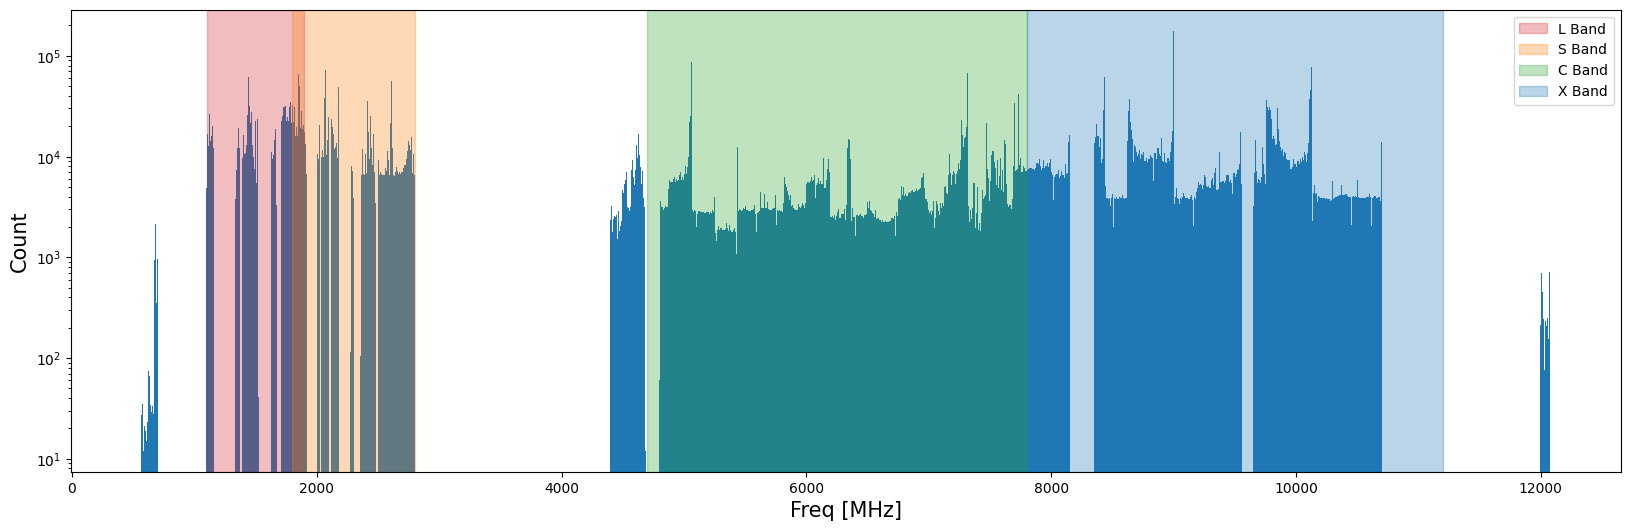

In [112]:
plt.figure(figsize=(20,6))
plt.hist(master_k_table['Freq'],bins=2000)
plt.axvspan(1100,1900,color='tab:red',label='L Band',alpha=.3)
plt.axvspan(1800,2800,color='tab:orange',label='S Band',alpha=.3)
plt.axvspan(4700,7800,color='tab:green',label='C Band',alpha=.3)
plt.axvspan(7800,11200,color='tab:blue',label='X Band',alpha=.3)
plt.legend(loc='upper right')
plt.yscale('log')
plt.xlabel('Freq [MHz]',fontsize=15)
plt.ylabel('Count',fontsize=15)

plt.savefig('/mnt_blpc1/datax/scratch/calebp/k_scores/freq_dist.png')
plt.show()


In [42]:
def table_stats(k_score_table, master_list):
    k_score_table = arrange(k_score_table)
    master_list.extend(k_score_table.to_dict('records'))
    return master_list

In [44]:
master_k_table = pd.DataFrame(master_list)

In [67]:
batche_infos = [eval(x) for x in list(set(master_k_table['Batch Info']))]

In [91]:
filtered_tuples = [t for t in batche_infos if t[0] == 4]

In [92]:
print(len(list(set([t[1] for t in filtered_tuples]))))

53


In [49]:
L_table = master_k_table[master_k_table['Freq'] < 1900] 
C_table = master_k_table[(master_k_table['Freq'] < 2800) & (master_k_table['Freq'] > 1800)]
S_table = master_k_table[(master_k_table['Freq'] < 7800) & (master_k_table['Freq'] > 4000)]
X_table = master_k_table[(master_k_table['Freq'] < 11200) & (master_k_table['Freq'] > 7800)]

In [106]:
list(set([eval(t) for t in np.array(master_k_table['Batch Info'])]))

[(1, 751),
 (2, 338),
 (3, 303),
 (0, 414),
 (1, 342),
 (1, 113),
 (0, 5),
 (3, 568),
 (2, 423),
 (1, 607),
 (2, 194),
 (1, 378),
 (0, 270),
 (1, 872),
 (2, 459),
 (3, 424),
 (1, 643),
 (3, 15),
 (1, 234),
 (3, 689),
 (1, 728),
 (2, 315),
 (3, 280),
 (1, 499),
 (0, 391),
 (3, 954),
 (1, 90),
 (1, 993),
 (3, 545),
 (1, 764),
 (3, 136),
 (1, 355),
 (3, 810),
 (2, 436),
 (3, 401),
 (1, 620),
 (2, 27),
 (1, 211),
 (0, 103),
 (3, 666),
 (1, 885),
 (2, 292),
 (3, 257),
 (1, 476),
 (0, 368),
 (3, 931),
 (1, 67),
 (3, 522),
 (3, 293),
 (1, 332),
 (1, 103),
 (0, 224),
 (3, 787),
 (2, 413),
 (1, 597),
 (0, 260),
 (1, 188),
 (3, 643),
 (1, 862),
 (3, 414),
 (2, 269),
 (1, 453),
 (3, 5),
 (1, 224),
 (0, 345),
 (0, 116),
 (3, 679),
 (2, 305),
 (3, 270),
 (1, 489),
 (0, 381),
 (1, 80),
 (1, 983),
 (1, 574),
 (1, 345),
 (0, 237),
 (3, 800),
 (1, 839),
 (2, 426),
 (3, 391),
 (1, 610),
 (2, 17),
 (1, 201),
 (0, 93),
 (1, 875),
 (2, 282),
 (1, 466),
 (3, 18),
 (0, 358),
 (1, 57),
 (1, 960),
 (3, 512),
 

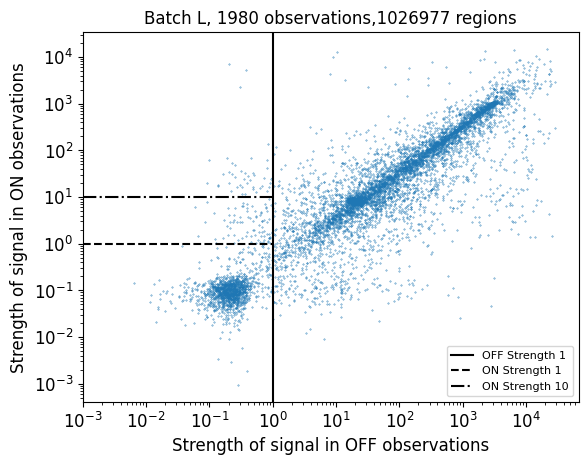

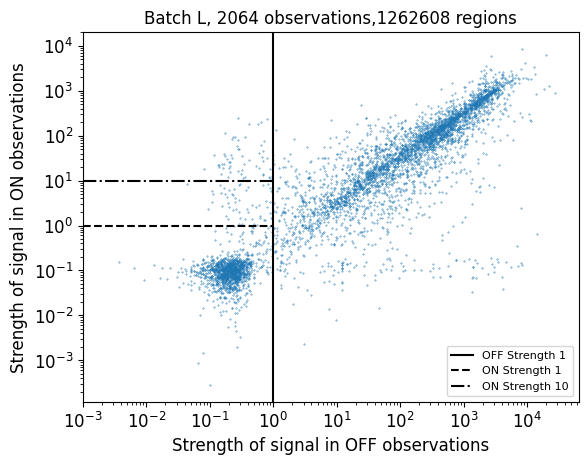

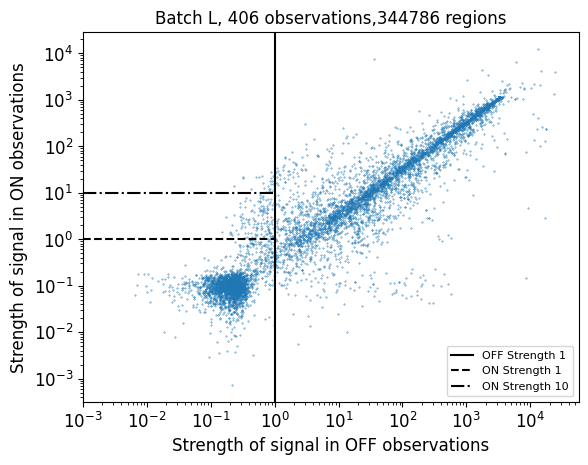

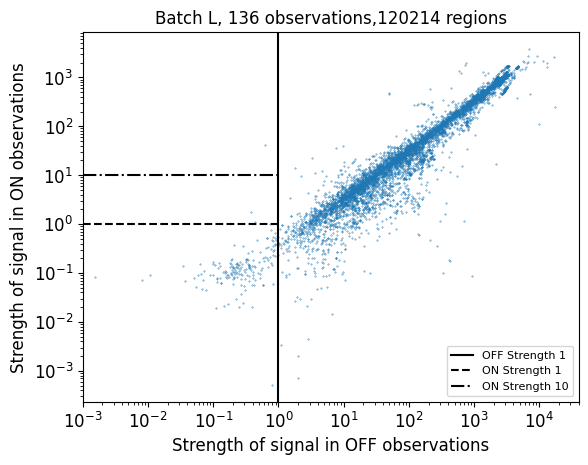

In [103]:
for table in [L_table,C_table,S_table,X_table]:
    fig = plt.figure()
    ax = fig.gca()
    plot_k_table(ax, table,'L')

0
1
2
3
4
5
6
7
8
9
10


Traceback (most recent call last):
  File "/tmp/ipykernel_2427756/1408353416.py", line 18, in <module>
    arrange_plot(axs[num],k_score_table)
  File "/tmp/ipykernel_2427756/3318063636.py", line 14, in arrange_plot
    sampled_df = df.sample(n=10000)  # Adjust n to your desired subset size
  File "/datax/scratch/calebp/miniconda3/lib/python3.10/site-packages/pandas/core/generic.py", line 5858, in sample
    sampled_indices = sample.sample(obj_len, size, replace, weights, rs)
  File "/datax/scratch/calebp/miniconda3/lib/python3.10/site-packages/pandas/core/sample.py", line 151, in sample
    return random_state.choice(obj_len, size=size, replace=replace, p=weights).astype(
  File "mtrand.pyx", line 984, in numpy.random.mtrand.RandomState.choice
ValueError: Cannot take a larger sample than population when 'replace=False'


None
Table 10 not Found
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
None
Table 31 not Found
32


Traceback (most recent call last):
  File "/tmp/ipykernel_2427756/1408353416.py", line 17, in <module>
    k_score_table = pd.read_csv(f"/datax/scratch/calebp/k_scores/updated_all_cadences_mason_jar_batch_{batch}_block_size_1024_snr_10_section_True.csv",dtype={"drift2": 'boolean',"blip or broadband": 'boolean'})
  File "/datax/scratch/calebp/miniconda3/lib/python3.10/site-packages/pandas/io/parsers/readers.py", line 912, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "/datax/scratch/calebp/miniconda3/lib/python3.10/site-packages/pandas/io/parsers/readers.py", line 577, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "/datax/scratch/calebp/miniconda3/lib/python3.10/site-packages/pandas/io/parsers/readers.py", line 1407, in __init__
    self._engine = self._make_engine(f, self.engine)
  File "/datax/scratch/calebp/miniconda3/lib/python3.10/site-packages/pandas/io/parsers/readers.py", line 1661, in _make_engine
    self.handles = get_handle(
  File "

33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59


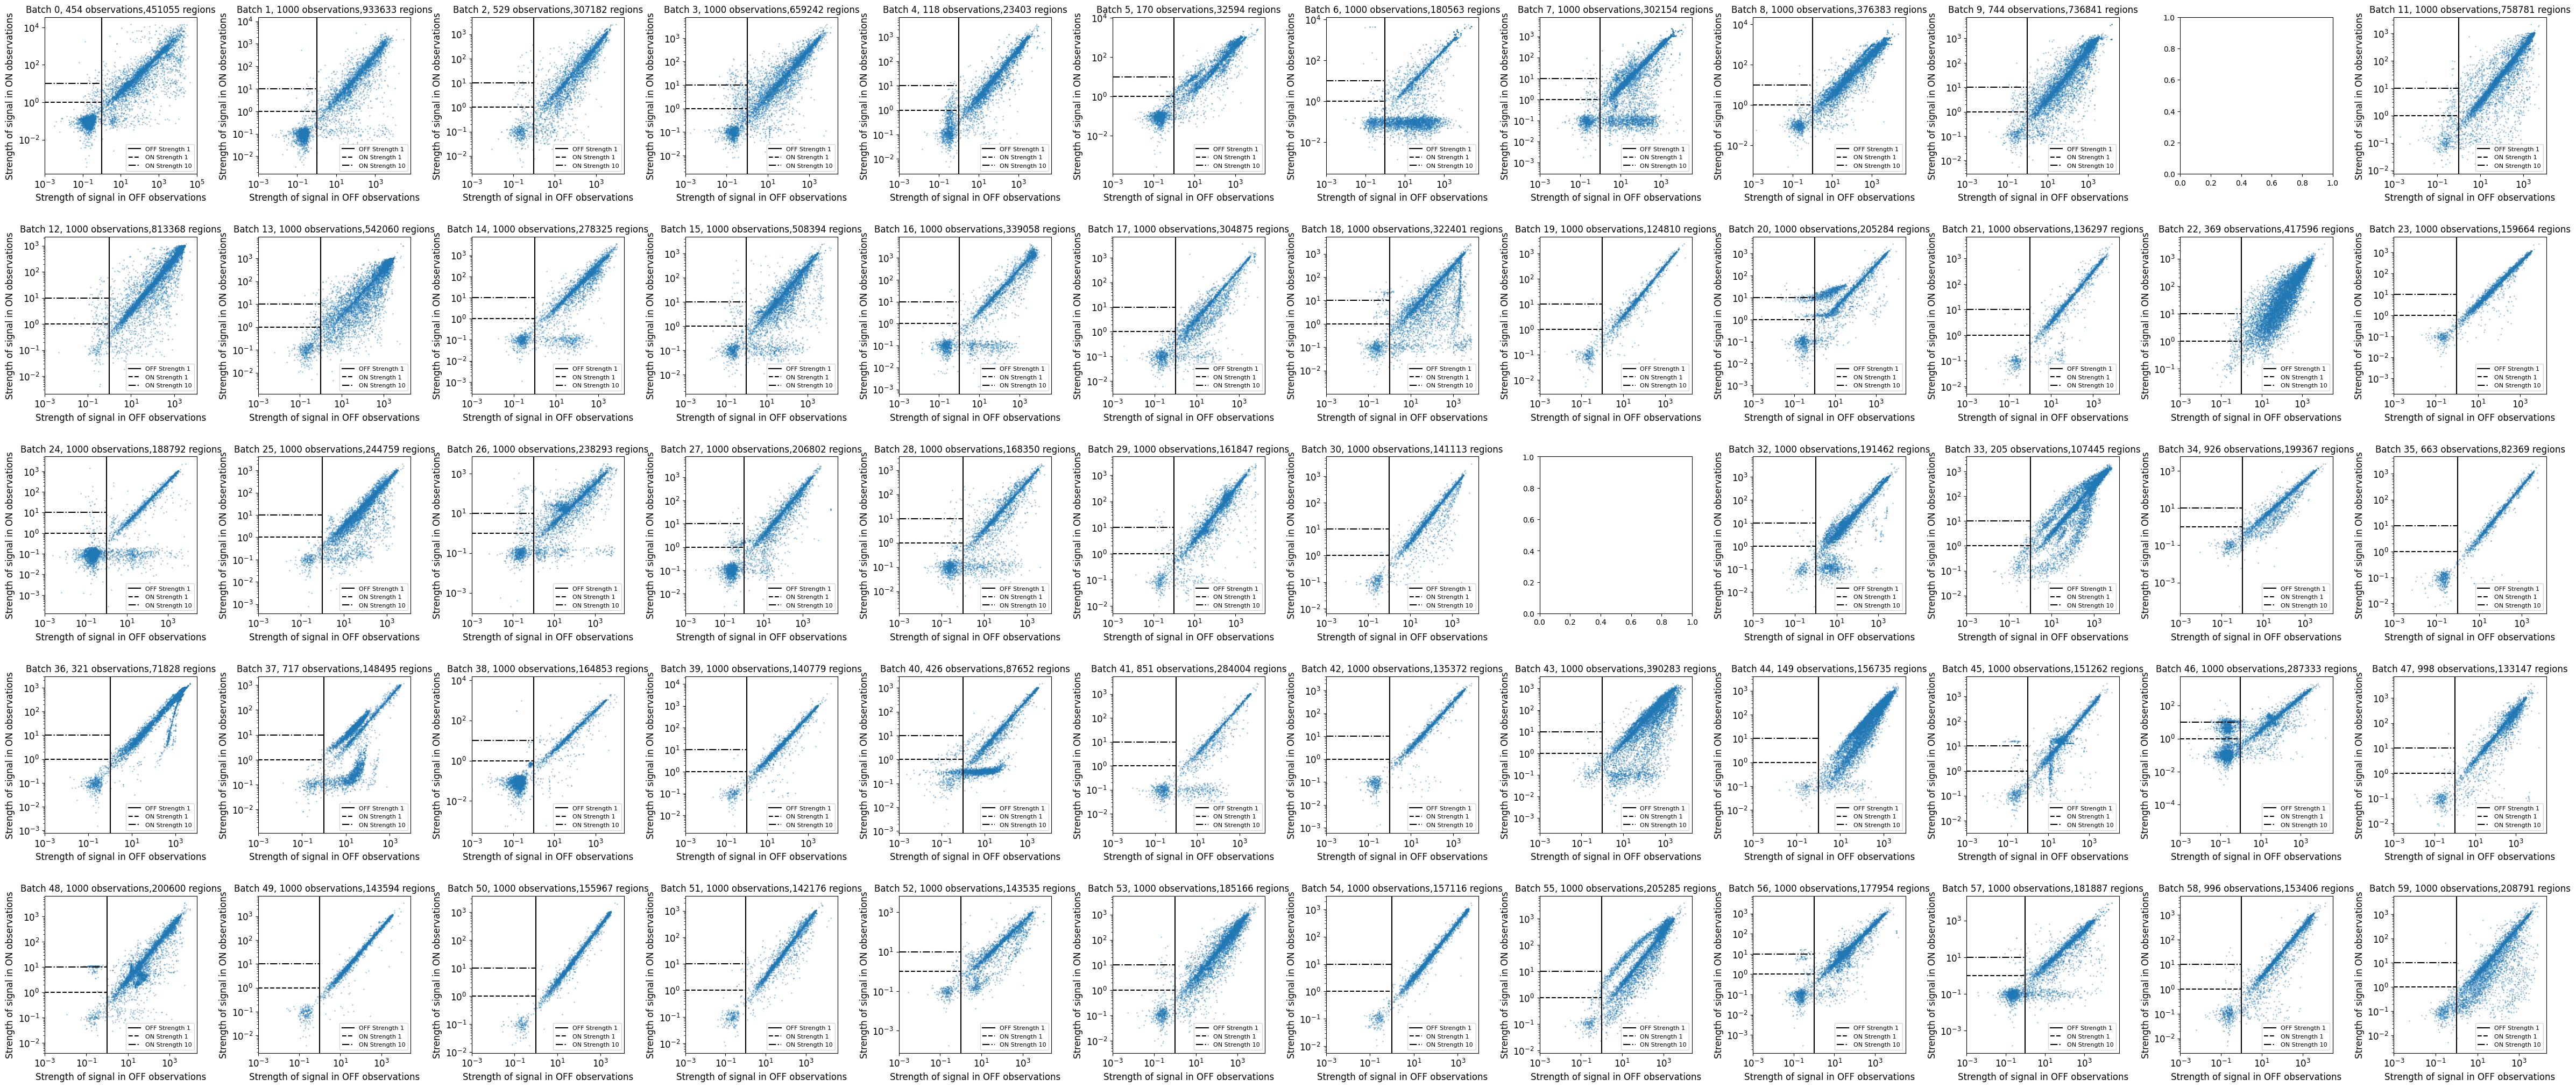

In [20]:
batch_range = range(0,60)
num_plots = len(batch_range)
cols = 12
rows = num_plots // cols + (num_plots % cols > 0)

fig, axs = plt.subplots(rows, cols, figsize=(cols*5, rows * 5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Adjust the spacing between plots
axs = axs.ravel()

for num,batch in enumerate(batch_range): 
    try:
        print(batch)
        if (batch > 10) and (batch<21):
            k_score_table = pd.read_csv(f"/datax/scratch/calebp/k_scores/updated_all_cadences_mason_jar_batch_{batch}_block_size_1024_snr_10_section_False.csv",dtype={"drift2": 'boolean',"blip or broadband": 'boolean'})
            arrange_plot(axs[num],k_score_table)
        else:
            k_score_table = pd.read_csv(f"/datax/scratch/calebp/k_scores/updated_all_cadences_mason_jar_batch_{batch}_block_size_1024_snr_10_section_True.csv",dtype={"drift2": 'boolean',"blip or broadband": 'boolean'})
            arrange_plot(axs[num],k_score_table)
    except Exception:
        print(traceback.print_exc())
        print(f"Table {batch} not Found")


# Save the figure
plt.savefig(f'/mnt_blpc1/datax/scratch/calebp/k_scores/new_batch_plots_{batch_range[0]}_{batch_range[-1]}.png')  # Adjust path as needed

# Optionally display the figure in this notebook
plt.show()

In [4]:
k_score_table = pd.read_csv(f"/datax/scratch/calebp/k_scores/updated_all_cadences_mason_jar_batch_1_block_size_1024_snr_10_section_True.csv",dtype={"drift2": 'boolean',"blip or broadband": 'boolean'})

NameError: name 'pd' is not defined

In [14]:
k_score_table = arrange(k_score_table)

x = k_score_table["off_k_sum"]
y = k_score_table["new_k"]

df = pd.DataFrame({
    'x': x,  # Replace these with your actual data
    'y': y,
})

# Downsampling
sampled_df = df.sample(n=10000)  # Adjust n to your desired subset size
x = sampled_df['x']
y = sampled_df['y']

(0.001, 118309.18807853761)

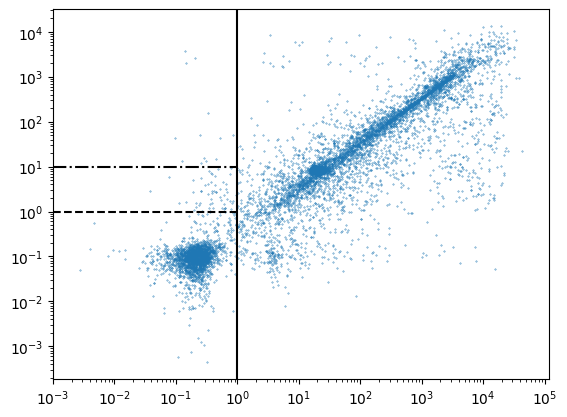

In [16]:
plt.scatter(x, y,s=.1,alpha=1,color='tab:blue',)
plt.xscale('log')
plt.yscale('log')
plt.axvline(x=1,color='black',label="OFF Strength 1")
# plt.hlines(y =10, xmin=10**-3 , xmax = 1,color='black',label="ON Strength 10")
plt.hlines(y =1, ls='--',xmin=10**-3 , xmax = 1,color='black',label="ON Strength 1")
plt.hlines(y =10,ls='-.', xmin=10**-3 , xmax = 1,color='black',label="ON Strength 10")


# plt.hlines(y =1, xmin=10**-3 , xmax = 1, ls='--',color='black')
plt.xlim(left=10**-3)

# Find Outliers with DBSCAN

In [ ]:
off_sum_training = np.array(k_score_table['off_k_sum'])
new_ks_training = np.array(k_score_table["new_k"])
logged_off_sum_training = [np.log(abs(i)) for i in off_sum_training]
logged_new_ks_training = [np.log(abs(i)) for i in new_ks_training]

# add the new features to the table
k_score_table["log_off_sum_training"] = logged_off_sum_training
k_score_table["log_k_score_training"] = logged_new_ks_training

In [ ]:
k_score_table = k_score_table.dropna()

In [ ]:
X_train = k_score_table[["log_off_sum_training","log_k_score_training"]]

model = DBSCAN()
model.fit(X_train)

In [ ]:
cluster_labels = model.labels_

k_score_table['labels'] = cluster_labels

In [ ]:
features_outliers = k_score_table[k_score_table['labels'] == -1]

In [ ]:
# grab outliers that fall in correct quandrant
high_k_outliers= k_score_table[(k_score_table["new_k"]>10) & (k_score_table["off_k_sum"]<1) & (k_score_table['labels'] == -1)]


In [ ]:

plt.scatter(k_score_table["log_off_sum_training"]/np.max(k_score_table["log_off_sum_training"]),k_score_table["log_k_score_training"]/np.max(k_score_table["log_k_score_training"]), c = cluster_labels, marker="P",cmap = 'Set2')
# plt.xscale('log')
# plt.yscale('log')
plt.rcParams["figure.figsize"] = (10,10) 
# plt.axvline(x=np.log(1),ls='--',color='black',label="OFF Strength 1")
# plt.hlines(y =10, xmin=10**-3 , xmax = 1,color='black',label="ON Strength 10")
# plt.hlines(y =np.log(1), xmin=-10, xmax = np.log(1),color='black',label="ON Strength 1")
# plt.xlim(left=-1)
plt.xlabel("Strength of signal in OFF observations",fontsize=25)
plt.ylabel("Strength of signal in ON observations",fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()


In [ ]:
zero_drifters = k_score_table[k_score_table['drift'] == 0]

In [ ]:
high_k_outliers= k_score_table[(k_score_table["new_k"]>k_score_table["off_k_sum"]) & (k_score_table['labels'] == -1)]

In [ ]:
plt.scatter(high_k_outliers["off_k_sum"],high_k_outliers["new_k"],marker="P",cmap = 'Set2')
# plt.xscale('log')
# plt.yscale('log')
plt.rcParams["figure.figsize"] = (10,10) 
# plt.axvline(x=np.log(1),ls='--',color='black',label="OFF Strength 1")
# plt.hlines(y =10, xmin=10**-3 , xmax = 1,color='black',label="ON Strength 10")
# plt.hlines(y =np.log(1), xmin=-10, xmax = np.log(1),color='black',label="ON Strength 1")
# plt.xlim(left=-1)
plt.xlabel("Strength of signal in OFF observations",fontsize=25)
plt.ylabel("Strength of signal in ON observations",fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()


In [ ]:
len(high_k_outliers)

In [ ]:
for num in range(15,47):
    block_size = 500
    k_regions = high_k_outliers
    try:
        all_files = np.array(k_regions["All Files"])[num]

        all_files = eval(all_files)
        print(all_files)
        
        hf_ON = h5py.File(all_files[0], 'r')
        hf_OFF = h5py.File(all_files[1], 'r')
        hf_ON2 = h5py.File(all_files[2], 'r')
        hf_OFF2 = h5py.File(all_files[3], 'r')
        hf_ON3 = h5py.File(all_files[4], 'r')
        hf_OFF3 = h5py.File(all_files[5], 'r')
        file_ON = all_files[0]
        hf_ON = h5py.File(all_files[0], 'r')
        fch1,foff,nchans = get_file_properties(hf_ON)

        
        i = np.array(k_regions["Index"])[num]
      
        print(i)
        print('k_score',np.array(k_regions["k_score"])[num])
        med_k =np.array(k_regions["med_k"])[num]
        min_k = np.array(k_regions["min_k"])[num]
        print('med_k_score',np.array(k_regions["med_k"])[num])
        freq = np.array(k_regions["Freq"])[num]
        new_k = med_k * min_k**2
        print("new score:",new_k)

        k2 = np.array(k_regions["k2"])[num]
        k4 = np.array(k_regions["k4"])[num]
        k6 = np.array(k_regions["k6"])[num]

        off_ks = k2+k4+k6

        print("off_ks",off_ks)


        # print(obs1_maxes)
        print(fch1,foff)

        # i = int((freq-fch1)/(foff*block_size))

        # frequency = np.array(k_regions["Freq"])[num]
        # i = int(np.round((frequency - fch1)/(block_size*foff)))
        print('index',i)


        lower = i * block_size
        upper = (i+1) * block_size
        plt.rcParams["figure.figsize"] = (5,5)   

        

        plot_candidates_sparse(hf_ON,hf_OFF,hf_ON2,hf_OFF2,hf_ON3,hf_OFF3,lower,upper,file_ON,foff,fch1,batch_info)
        # k_score = get_k(hf_ON,hf_OFF,hf_ON2,hf_OFF2,hf_ON3,hf_OFF3,lower,upper,file_ON,foff,fch1)
    except:
        print(traceback.print_exc())


# Plot Good Candidates

In [ ]:
np.array(high_k_outliers['drift2'])[-1]

In [ ]:
# high_k_outliers= k_score_table[(k_score_table["new_k"]>1) & (k_score_table["off_k_sum"]<1) & (k_score_table["drift"] == 1.0)]
high_k_outliers= k_score_table[(k_score_table["new_k"]>10) & (k_score_table["off_k_sum"]<1)]
high_k_outliers

In [ ]:
high_k_outliers, info, info2 = super_wrapper(f"/datax/scratch/calebp/k_scores/updated_all_cadences_mason_jar_batch_0_block_size_1024_snr_10_section_False.csv")

In [ ]:
index_diff = high_k_outliers['Index'].diff()

# Filter rows, keeping those where the difference is not 0.5
high_k_outliers = high_k_outliers[index_diff != 0.5]
high_k_outliers

In [119]:
# implement max_range column
def get_bbs(high_k_outliers):
    max_ranges = []
    bbs = []
    for i in tqdm(range(0,len(high_k_outliers))):
        obs1_maxes = eval(np.array(high_k_outliers["obs1 maxes"])[i])
        obs3_maxes = eval(np.array(high_k_outliers["obs3 maxes"])[i])
        obs5_maxes = eval(np.array(high_k_outliers["obs5 maxes"])[i])
        
        snr_1,threshold_1 = get_snr(obs1_maxes,10)
        snr_3,threshold_3 = get_snr(obs3_maxes,10)
        snr_5,threshold_5 = get_snr(obs5_maxes,10)
    
        blip_or_broadband = False
        if sum([snr_1,snr_3,snr_5]) >= 1:
            blip_or_broadband = True
    
        ranges = [np.median(obs1_maxes)-np.max(obs1_maxes),np.median(obs3_maxes)-np.max(obs3_maxes),np.median(obs5_maxes)-np.max(obs5_maxes)]
        max_ranges.append(np.min(ranges))
        bbs.append(blip_or_broadband)
    return bbs

In [ ]:
k_regions = high_k_outliers

all_files = np.array(k_regions["All Files"])[3]
print(all_files)
all_files = eval(all_files)
print(all_files)
# freq = np.array(k_regions["freq"])[num]

hf_ON = h5py.File(all_files[0], 'r')
hf_OFF = h5py.File(all_files[1], 'r')
hf_ON2 = h5py.File(all_files[2], 'r')
hf_OFF2 = h5py.File(all_files[3], 'r')
hf_ON3 = h5py.File(all_files[4], 'r')
hf_OFF3 = h5py.File(all_files[5], 'r')
file_ON = all_files[0]

hf_ON = h5py.File(all_files[0], 'r')
fch1,foff,nchans = get_file_properties(hf_ON)

block_size = 1024
indexes = np.sort(np.array(k_regions["Index"]))
print(indexes)

print((indexes*block_size*foff)+fch1)

freqs = np.sort(np.array(k_regions["Freq"]))
print(freqs)


sections = np.linspace(fch1,fch1+foff*nchans,16)
section_blocks = np.round(abs((sections-fch1)/(block_size*foff)))

observations = [hf_ON, hf_OFF, hf_ON2, hf_OFF2, hf_ON3, hf_OFF3]

print('indexes',indexes)
print('section_blocks',section_blocks)

for num in range(len(section_blocks)):
    section = section_blocks[num+1]
    round = np.array([x for x in indexes if x <= section])
    print(round)
    print('freqs',(round*block_size*foff)+fch1)
    # round = [ int(x) for x in round ]
    
    indexes = set(indexes) - set(round)
    round = round - section_blocks[num]

    sectioned_observations = []
    lower = int(np.round(section_blocks[num]*block_size))
    upper = int(np.round(section_blocks[num+1]*block_size))


    if len(round) > 0:
        for obs_data in tqdm(observations):
            section =  np.squeeze(obs_data['data'][:,:,lower:upper],axis=1)
            sectioned_observations.append(section)
            
        for i in round:
            print(i)
            lower = int((i) * block_size)
            upper = int((i+1) * block_size)
            print(lower,upper)
            print((lower*foff)+fch1,(upper*foff)+fch1)
            plot_candidates_speed(sectioned_observations[0],sectioned_observations[1],sectioned_observations[2],sectioned_observations[3],sectioned_observations[4],sectioned_observations[5],lower,upper,file_ON,foff,fch1,block_size,section_blocks[num])
        


In [ ]:
for i in range(0,20):
    single_plot_wrapper(i)

In [113]:
def single_plot_wrapper(num):
    fig = plt.figure(figsize=(7, 9))
    fig_grid = gridspec.GridSpec(1, 1, hspace=0.2)

    k_regions = high_k_outliers
    all_files = np.array(k_regions["All Files"])[num]
    batch_info = np.array(k_regions["Batch Info"])[num]
    drift2 = np.array(k_regions["drift2"])[num]

    all_files = eval(all_files)
    # freq = np.array(k_regions["freq"])[num]

    hf_ON = h5py.File(all_files[0], 'r')
    hf_OFF = h5py.File(all_files[1], 'r')
    hf_ON2 = h5py.File(all_files[2], 'r')
    hf_OFF2 = h5py.File(all_files[3], 'r')
    hf_ON3 = h5py.File(all_files[4], 'r')
    hf_OFF3 = h5py.File(all_files[5], 'r')
    file_ON = all_files[0]
    hf_ON = h5py.File(all_files[0], 'r')
    fch1,foff,nchans = get_file_properties(hf_ON)

    block_size = int(np.array(k_regions["Block Size"])[num])
    i = np.array(k_regions["Index"])[num]
    freq = np.array(k_regions["Freq"])[num]
    i = ((freq-fch1)/foff)/block_size

  
    med_k =np.array(k_regions["med_k"])[num]
    min_k = np.array(k_regions["min_k"])[num]
    freq = np.array(k_regions["Freq"])[num]
    
    new_k = med_k * min_k**2

    k2 = np.array(k_regions["k2"])[num]
    k4 = np.array(k_regions["k4"])[num]
    k6 = np.array(k_regions["k6"])[num]

    off_ks = k2+k4+k6
    
    lower = int((i) * block_size)
    upper = int((i+1) * block_size)

    
    file_ON = all_files[0]
    name = file_ON.split('/')[-1]

    target = name.split("_")[-2]
    if target == 'OFF':
        target = name.split("_")[-3]
    obs_num = name.split("_")[-1]
    MJD = name.split("_")[4]
    node = name.split("_")[0]

    
    plt.rcParams["figure.figsize"] = (5,5)  
    
    buffer = 250
    lower = lower - buffer
    upper = upper + buffer
    plot_candidates_sparse(hf_ON,hf_OFF,hf_ON2,hf_OFF2,hf_ON3,hf_OFF3,lower,upper,file_ON,foff,fch1,block_size+2*buffer,batch_info,0,fig_grid,0,buffer)
    plt.savefig(f'/mnt_blpc1/datax/scratch/calebp/pickles/candidates/candidate_batch_{eval(batch_info)[0]}_number_{num}_source_{target}_date_{MJD}_node_{node}_lower_{lower}_upper_{upper}.png',dpi=100)  # Adjust path as needed
    plt.show() 
 

In [114]:
def plot_wrapper(start,end):

    num_plots = len(batch_range)
    cols = 3
    rows = num_plots // cols + (num_plots % cols > 0)
    
    fig = plt.figure(figsize=(cols*5, rows*8))  # Adjust the figure size as needed

    num_groups = len(range(start,end))
    # Create a GridSpec for the entire figure (for 3 groups in this example, adjust as needed)
    fig_grid = gridspec.GridSpec(rows, cols, hspace=0.2)

    for ax,num in tqdm(enumerate(range(start,end))):
        try:
            k_regions = high_k_outliers
            all_files = np.array(k_regions["All Files"])[num]
            batch_info = np.array(k_regions["Batch Info"])[num]
            drift2 = np.array(k_regions["drift2"])[num]

            all_files = eval(all_files)
            # freq = np.array(k_regions["freq"])[num]

            hf_ON = h5py.File(all_files[0], 'r')
            hf_OFF = h5py.File(all_files[1], 'r')
            hf_ON2 = h5py.File(all_files[2], 'r')
            hf_OFF2 = h5py.File(all_files[3], 'r')
            hf_ON3 = h5py.File(all_files[4], 'r')
            hf_OFF3 = h5py.File(all_files[5], 'r')
            file_ON = all_files[0]
            hf_ON = h5py.File(all_files[0], 'r')
            fch1,foff,nchans = get_file_properties(hf_ON)


            block_size = int(np.array(k_regions["Block Size"])[num])
            i = np.array(k_regions["Index"])[num]
            freq = np.array(k_regions["Freq"])[num]
            i = ((freq-fch1)/foff)/block_size
    
          
            med_k =np.array(k_regions["med_k"])[num]
            min_k = np.array(k_regions["min_k"])[num]
            freq = np.array(k_regions["Freq"])[num]
            
            new_k = med_k * min_k**2
    
            k2 = np.array(k_regions["k2"])[num]
            k4 = np.array(k_regions["k4"])[num]
            k6 = np.array(k_regions["k6"])[num]
    
            off_ks = k2+k4+k6
    
    
    
            # print(obs1_maxes)
    
            # i = int((freq-fch1)/(foff*block_size))
    
            # frequency = np.array(k_regions["Freq"])[num]
            # i = int(np.round((frequency - fch1)/(block_size*foff)))
            lower = int((i) * block_size)
            upper = int((i+1) * block_size)
        
            plt.rcParams["figure.figsize"] = (5,5)   


            verbose = False
            if verbose:
                print('k_score',np.array(k_regions["k_score"])[num])
                print('med_k_score',np.array(k_regions["med_k"])[num])
                print("new score:",new_k)
                print('on ks',np.array(k_regions["k1"])[num],np.array(k_regions["k3"])[num],np.array(k_regions["k5"])[num])
                print("off_ks",off_ks)
                
                print("DRIFT2:",drift2)
                print("BLIB/BROADBAND",bbs[num])

                print("Start Channel: %0.10f Frequency Bin: %0.30f # Channels: %d" % (fch1,foff,nchans))
                print(fch1,foff)
                print('index',i)
                print('block size',block_size)
            print('lower,upper',lower,upper)


            # add some padding to the plots
            buffer = 250
            lower = lower - buffer
            upper = upper + buffer
            plot_candidates_sparse(hf_ON,hf_OFF,hf_ON2,hf_OFF2,hf_ON3,hf_OFF3,lower,upper,file_ON,foff,fch1,block_size+2*buffer,batch_info,axs[ax],fig_grid,ax,buffer)
            # k_score = get_k(hf_ON,hf_OFF,hf_ON2,hf_OFF2,hf_ON3,hf_OFF3,lower,upper,file_ON,foff,fch1)
        except:
            print(traceback.print_exc())
            
    plt.savefig(f'/mnt_blpc1/datax/scratch/calebp/k_scores/outlier_plots_batch_{eval(batch_info)[0]}_numbers_{start}_{end}.png')  # Adjust path as needed



In [115]:
def super_wrapper(file):
    k_score_table = pd.read_csv(file,dtype={"drift2": 'boolean',"blip or broadband": 'boolean'})
    num_obs_run_out = eval(np.array(k_score_table["Batch Info"])[-1])
    print(f"File for batch {num_obs_run_out[0]} is {len(k_score_table)} long and holds {num_obs_run_out[1]} observations")

    k_score_table.rename(columns={'median_k_score': 'med_k', 'min_k_score': 'min_k'}, inplace=True)
    all_k_scores = np.array(k_score_table["k_score"])

    k1_values = np.array(k_score_table["k1"])
    k2_values = np.array(k_score_table["k2"])
    k3_values = np.array(k_score_table["k3"])
    k4_values = np.array(k_score_table["k4"])
    k5_values = np.array(k_score_table["k5"])
    k6_values = np.array(k_score_table["k6"])

    med_ks = np.array(k_score_table["med_k"])
    min_ks = np.array(k_score_table["min_k"])
    max_ks = np.array(k_score_table["max_k"])


    k_score_table["new_k"] = med_ks
    k_score_table["off_k_sum"] = k2_values+k4_values+k6_values
    
    high_k_outliers= k_score_table[(k_score_table["new_k"]>3) & (k_score_table["off_k_sum"]<.5) & (k_score_table["drift2"] == 1.0) & (k_score_table["drift1"] == 1.0)]
    
    index_diff = high_k_outliers['Index'].diff()
    
    # Filter rows, keeping those where the difference is not 0.5
    high_k_outliers = high_k_outliers[index_diff != 0.5]

    high_k_outliers.head()

    bbs = get_bbs(high_k_outliers)
    high_k_outliers['bb'] = bbs

    high_k_outliers = high_k_outliers[high_k_outliers['bb'] == False]
    
    print(f"{len(high_k_outliers)} outliers")
    return high_k_outliers, (num_obs_run_out[0],num_obs_run_out[1]), len(k_score_table)


In [123]:
batch_range = range(0,70)
all_outliers = []
for num,batch in enumerate(batch_range): 
    try:
        print(batch)
        if (batch > 10) and (batch<21):
            outliers, e1,e2 = super_wrapper(f"/datax/scratch/calebp/k_scores/updated_all_cadences_mason_jar_batch_{batch}_block_size_1024_snr_10_section_False.csv")
            all_outliers.extend(outliers.to_dict('records'))
        else:
            outliers, e1,e2 = super_wrapper(f"/datax/scratch/calebp/k_scores/updated_all_cadences_mason_jar_batch_{batch}_block_size_1024_snr_10_section_True.csv")
            all_outliers.extend(outliers.to_dict('records'))
    except Exception:
        print(traceback.print_exc())
        print(f"Table {batch} not Found")


0
File for batch 0 is 491513 long and holds 504 observations


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 362/362 [00:00<00:00, 790.25it/s]


151 outliers
1
File for batch 1 is 933633 long and holds 1000 observations


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 475/475 [00:00<00:00, 783.97it/s]


272 outliers
2
File for batch 2 is 307182 long and holds 529 observations


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 251/251 [00:00<00:00, 790.44it/s]


87 outliers
3
File for batch 3 is 659242 long and holds 1000 observations


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 805/805 [00:01<00:00, 731.64it/s]


521 outliers
4
File for batch 4 is 23403 long and holds 118 observations


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 595.49it/s]

0 outliers
5


File for batch 5 is 32594 long and holds 170 observations


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 392.93it/s]

0 outliers
6


File for batch 6 is 180563 long and holds 1000 observations


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [00:00<00:00, 782.81it/s]

9 outliers
7


File for batch 7 is 302154 long and holds 1000 observations


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 628/628 [00:00<00:00, 741.70it/s]


13 outliers
8
File for batch 8 is 376383 long and holds 1000 observations


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 92/92 [00:00<00:00, 756.39it/s]

16 outliers
9


File for batch 9 is 736841 long and holds 744 observations


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 563/563 [00:00<00:00, 744.44it/s]


180 outliers
10
File for batch 10 is 97256 long and holds 23 observations


0it [00:00, ?it/s]

0 outliers
11


File for batch 11 is 758781 long and holds 1000 observations


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 736/736 [00:00<00:00, 742.52it/s]


20 outliers
12
File for batch 12 is 813368 long and holds 1000 observations


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:00<00:00, 752.91it/s]


214 outliers
13
File for batch 13 is 542060 long and holds 1000 observations


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 729.89it/s]

2 outliers
14


File for batch 14 is 278325 long and holds 1000 observations


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 749.81it/s]

12 outliers
15


File for batch 15 is 508394 long and holds 1000 observations


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1421/1421 [00:01<00:00, 742.95it/s]


20 outliers
16
File for batch 16 is 339058 long and holds 1000 observations


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 740.28it/s]

3 outliers
17


File for batch 17 is 304875 long and holds 1000 observations


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 655.38it/s]

0 outliers
18


File for batch 18 is 322401 long and holds 1000 observations


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 859/859 [00:01<00:00, 728.87it/s]


21 outliers
19
File for batch 19 is 124810 long and holds 1000 observations


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 730.83it/s]

0 outliers
20


File for batch 20 is 205284 long and holds 1000 observations


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3737/3737 [00:05<00:00, 739.56it/s]


3690 outliers
21
File for batch 21 is 136297 long and holds 1000 observations


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 558.69it/s]

1 outliers
22


File for batch 22 is 417596 long and holds 369 observations


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 109/109 [00:00<00:00, 793.73it/s]

1 outliers
23


File for batch 23 is 159664 long and holds 1000 observations


0it [00:00, ?it/s]

0 outliers
24


File for batch 24 is 188792 long and holds 1000 observations


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 449/449 [00:00<00:00, 806.09it/s]


25 outliers
25
File for batch 25 is 244759 long and holds 1000 observations


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 456.55it/s]

1 outliers
26


File for batch 26 is 238293 long and holds 1000 observations


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 163/163 [00:00<00:00, 773.49it/s]


15 outliers
27
File for batch 27 is 206802 long and holds 1000 observations


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 410/410 [00:00<00:00, 773.42it/s]


51 outliers
28
File for batch 28 is 168350 long and holds 1000 observations


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:00<00:00, 800.59it/s]


0 outliers
29
File for batch 29 is 161847 long and holds 1000 observations


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 177/177 [00:00<00:00, 767.86it/s]


11 outliers
30
File for batch 30 is 141113 long and holds 1000 observations


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 473.37it/s]

0 outliers
31


File for batch 31 is 49480 long and holds 268 observations


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 440.86it/s]

0 outliers
32


File for batch 32 is 191462 long and holds 1000 observations


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 55/55 [00:00<00:00, 774.82it/s]

0 outliers
33


File for batch 33 is 107445 long and holds 205 observations


0it [00:00, ?it/s]

0 outliers
34


File for batch 34 is 199367 long and holds 926 observations


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 481.72it/s]

1 outliers
35


File for batch 35 is 82369 long and holds 663 observations


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 453.63it/s]

0 outliers
36


File for batch 36 is 71828 long and holds 321 observations


0it [00:00, ?it/s]

0 outliers
37


File for batch 37 is 148495 long and holds 717 observations


0it [00:00, ?it/s]

0 outliers
38


File for batch 38 is 164853 long and holds 1000 observations


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 802.41it/s]

0 outliers
39


File for batch 39 is 140779 long and holds 1000 observations


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 710.69it/s]

0 outliers
40


File for batch 40 is 87652 long and holds 426 observations


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 755.58it/s]

16 outliers
41


File for batch 41 is 304634 long and holds 1000 observations


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 348.68it/s]

0 outliers
42


File for batch 42 is 135372 long and holds 1000 observations


0it [00:00, ?it/s]

0 outliers
43


File for batch 43 is 390283 long and holds 1000 observations


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 185/185 [00:00<00:00, 811.44it/s]


5 outliers
44
File for batch 44 is 156735 long and holds 149 observations


0it [00:00, ?it/s]

0 outliers
45


File for batch 45 is 151262 long and holds 1000 observations


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 475/475 [00:00<00:00, 770.07it/s]


0 outliers
46
File for batch 46 is 287333 long and holds 1000 observations


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19427/19427 [00:39<00:00, 489.70it/s]


1 outliers
47
File for batch 47 is 133147 long and holds 998 observations


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 54/54 [00:00<00:00, 768.22it/s]

6 outliers
48


File for batch 48 is 200600 long and holds 1000 observations


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3267/3267 [00:04<00:00, 679.25it/s]


1 outliers
49
File for batch 49 is 143594 long and holds 1000 observations


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 451.24it/s]

0 outliers
50


File for batch 50 is 155967 long and holds 1000 observations


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 458.34it/s]

0 outliers
51


File for batch 51 is 142176 long and holds 1000 observations


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 778.73it/s]

0 outliers
52


File for batch 52 is 143535 long and holds 1000 observations


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 478.12it/s]

1 outliers
53


File for batch 53 is 185166 long and holds 1000 observations


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 544/544 [00:00<00:00, 751.15it/s]


23 outliers
54
File for batch 54 is 157116 long and holds 1000 observations


0it [00:00, ?it/s]

0 outliers
55


File for batch 55 is 205285 long and holds 1000 observations


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 479.40it/s]

0 outliers
56


File for batch 56 is 177954 long and holds 1000 observations


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1206/1206 [00:01<00:00, 788.61it/s]


0 outliers
57
File for batch 57 is 181887 long and holds 1000 observations


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 99/99 [00:00<00:00, 827.44it/s]

3 outliers
58


File for batch 58 is 153406 long and holds 996 observations


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 828.87it/s]

37 outliers
59


File for batch 59 is 208791 long and holds 1000 observations


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 754.22it/s]

0 outliers
60


File for batch 60 is 185774 long and holds 1000 observations


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 62/62 [00:00<00:00, 794.33it/s]

0 outliers
61


File for batch 61 is 195124 long and holds 1000 observations


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3780/3780 [00:05<00:00, 735.30it/s]


1 outliers
62
File for batch 62 is 239538 long and holds 1000 observations


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2358/2358 [00:03<00:00, 753.10it/s]


12 outliers
63
File for batch 63 is 227197 long and holds 1000 observations


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 556/556 [00:00<00:00, 737.27it/s]


66 outliers
64
File for batch 64 is 146779 long and holds 1000 observations


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 698.47it/s]

0 outliers
65


File for batch 65 is 161154 long and holds 1000 observations


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 59/59 [00:00<00:00, 762.96it/s]

0 outliers
66


File for batch 66 is 141423 long and holds 1000 observations


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:00<00:00, 766.80it/s]

0 outliers
67


File for batch 67 is 158490 long and holds 1000 observations


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 685/685 [00:00<00:00, 763.00it/s]


9 outliers
68
File for batch 68 is 170062 long and holds 1000 observations


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1988/1988 [00:02<00:00, 775.14it/s]


0 outliers
69
File for batch 69 is 140660 long and holds 1000 observations


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 701.49it/s]

0 outliers


In [128]:
all_outliers = pd.DataFrame(all_outliers)

In [135]:
all_outliers.to_csv('databases/all_outiers_4_9_24.csv')

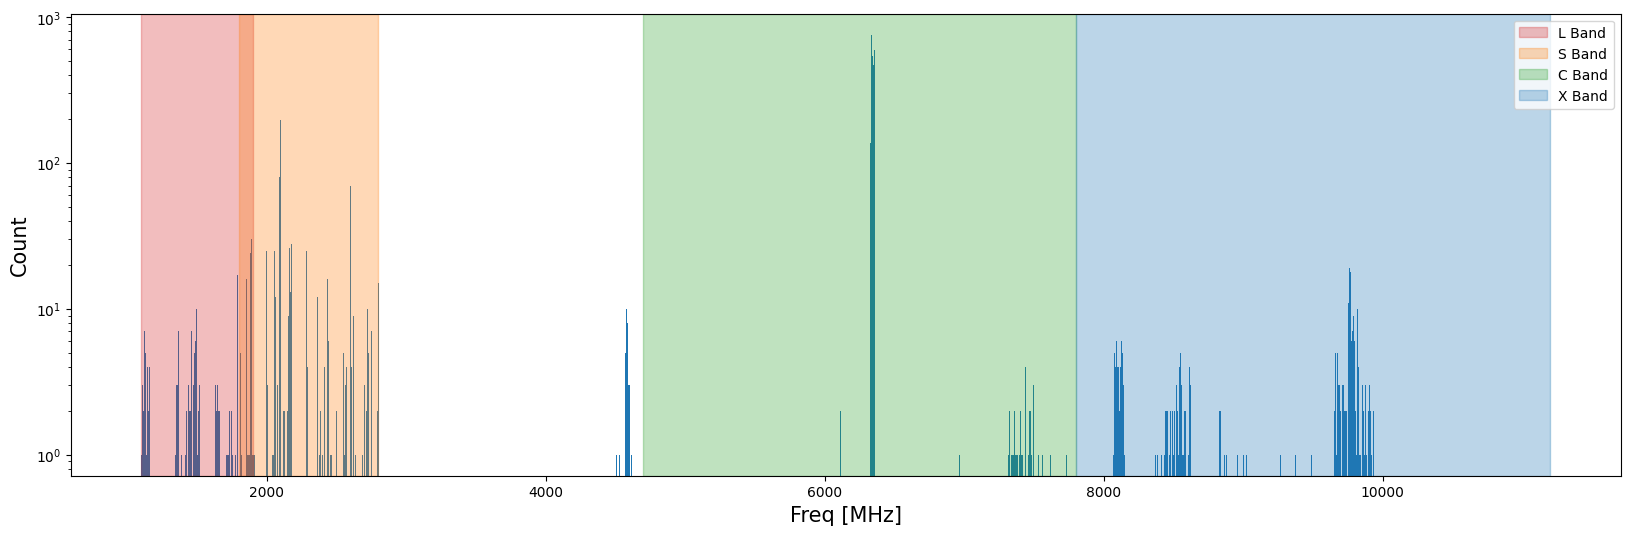

In [132]:
plt.figure(figsize=(20,6))
plt.hist(all_outliers['Freq'],bins=2000)
plt.axvspan(1100,1900,color='tab:red',label='L Band',alpha=.3)
plt.axvspan(1800,2800,color='tab:orange',label='S Band',alpha=.3)
plt.axvspan(4700,7800,color='tab:green',label='C Band',alpha=.3)
plt.axvspan(7800,11200,color='tab:blue',label='X Band',alpha=.3)
plt.legend(loc='upper right')
plt.yscale('log')
plt.xlabel('Freq [MHz]',fontsize=15)
plt.ylabel('Count',fontsize=15)

plt.savefig('/mnt_blpc1/datax/scratch/calebp/k_scores/outlier_dist.png')
plt.show()

In [32]:
print(k_score_table.head(-5))

                                                All Files     Index  \
0       ['/datag/pipeline/AGBT16A_999_95/holding/splic...     504.0   
1       ['/datag/pipeline/AGBT16A_999_95/holding/splic...     504.5   
2       ['/datag/pipeline/AGBT16A_999_95/holding/splic...     504.5   
3       ['/datag/pipeline/AGBT16A_999_95/holding/splic...     505.0   
4       ['/datag/pipeline/AGBT16A_999_95/holding/splic...     517.0   
...                                                   ...       ...   
933623  ['/datag/pipeline/AGBT16B_999_70/holding/splic...  341503.5   
933624  ['/datag/pipeline/AGBT16B_999_70/holding/splic...  333741.0   
933625  ['/datag/pipeline/AGBT16B_999_70/holding/splic...  341504.0   
933626  ['/datag/pipeline/AGBT16B_999_70/holding/splic...  342527.5   
933627  ['/datag/pipeline/AGBT16B_999_70/holding/splic...  342528.0   

        Block Size         Freq  \
0             1024  1875.001452   
1             1024  1875.000000   
2             1024  1875.000000   
3      

In [32]:
print(k_score_table.head(-5))

                                                All Files     Index  \
0       ['/datag/pipeline/AGBT16A_999_95/holding/splic...     504.0   
1       ['/datag/pipeline/AGBT16A_999_95/holding/splic...     504.5   
2       ['/datag/pipeline/AGBT16A_999_95/holding/splic...     504.5   
3       ['/datag/pipeline/AGBT16A_999_95/holding/splic...     505.0   
4       ['/datag/pipeline/AGBT16A_999_95/holding/splic...     517.0   
...                                                   ...       ...   
933623  ['/datag/pipeline/AGBT16B_999_70/holding/splic...  341503.5   
933624  ['/datag/pipeline/AGBT16B_999_70/holding/splic...  333741.0   
933625  ['/datag/pipeline/AGBT16B_999_70/holding/splic...  341504.0   
933626  ['/datag/pipeline/AGBT16B_999_70/holding/splic...  342527.5   
933627  ['/datag/pipeline/AGBT16B_999_70/holding/splic...  342528.0   

        Block Size         Freq  \
0             1024  1875.001452   
1             1024  1875.000000   
2             1024  1875.000000   
3      

In [ ]:
batch = 0

high_k_outliers, info1, info2 = super_wrapper(f"/datax/scratch/calebp/k_scores/updated_all_cadences_mason_jar_batch_{batch}_block_size_1024_snr_10_section_False.csv")

In [ ]:
k_score_tableTrue = pd.read_csv("/datax/scratch/calebp/k_scores/updated_all_cadences_mason_jar_batch_0_block_size_1024_snr_10_section_True.csv",dtype={"drift2": 'boolean',"blip or broadband": 'boolean'})
k_score_tableTrue

In [ ]:
k_score_tableTrue

In [ ]:
k_score_tableTrue[k_score_tableTrue['Batch Info'] == '(0, 65)']

In [ ]:
k_score_tableTrue_0 = k_score_tableTrue[k_score_tableTrue['Batch Info'] == '(0, 0)']
plt.hist(k_score_tableTrue_0['Freq'],bins=100)
plt.xlim(1100,1900)

In [ ]:
k_score_table_0 = k_score_table[k_score_table['Batch Info'] == '(0, 0)']
plt.hist(k_score_table_0['Freq'],bins=100)
plt.xlim(1100,1900)

In [ ]:
plot_wrapper(100,130)

In [ ]:
infos2 = []
for i in tqdm(range(11,21)):
    high_k_outliers, info = super_wrapper(f"/datax/scratch/calebp/k_scores/updated_all_cadences_mason_jar_batch_{i}_block_size_1024_snr_10_section_False.csv")
    print(info)
    infos2.append(info)

In [ ]:
a=outliers
# b = num_regions
c = obs

ind = np.arange(len(a))  # the x locations for the groups
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width, a, width, label='A')
# rects2 = ax.bar(ind, b, width, label='B')
rects3 = ax.bar(ind + width, c, width, label='C')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and list')
ax.set_xticks(ind)
ax.legend()

# Function to autolabel bars (optional, but adds a nice touch)
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.yscale('log')

plt.show()


In [ ]:
infos3 = []
outliers= []
num_regions = []
obs = []
for i in tqdm(range(21,70)):
    try:
        high_k_outliers, info, num = super_wrapper(f"/datax/scratch/calebp/k_scores/updated_all_cadences_mason_jar_batch_{i}_block_size_1024_snr_10_section_True.csv")
        infos3.append(info)
        
        outliers.append(len(high_k_outliers))
        num_regions.append(num)
        obs.append(i)
    except:
        outliers.append(0)
        num_regions.append(0)
        obs.append(i)
        

In [ ]:
infos = []
for i in tqdm(range(1,11)):
    high_k_outliers, info = super_wrapper(f"/datax/scratch/calebp/k_scores/updated_all_cadences_mason_jar_batch_{i}_block_size_1024_snr_10_section_True.csv")
    print(info)
    infos.append(info)

In [ ]:
all_infos = infos+infos2+infos3

In [ ]:
sum([x[1] for x in all_infos])

In [ ]:
plt.bar([x[0] for x in all_infos],[x[1] for x in all_infos])
plt.xlabel("Batch Number")
plt.ylabel("Num of observations completed")

In [ ]:
plt.scatter(np.array(high_k_outliers['new_k']),np.array(high_k_outliers['Freq']))
plt.xscale('log')

In [ ]:
all_files = np.array(high_k_outliers["All Files"])[0]
all_files = eval(all_files)

hf_ON = h5py.File(all_files[0], 'r')
hf_OFF = h5py.File(all_files[1], 'r')
hf_ON2 = h5py.File(all_files[2], 'r')
hf_OFF2 = h5py.File(all_files[3], 'r')
hf_ON3 = h5py.File(all_files[4], 'r')
hf_OFF3 = h5py.File(all_files[5], 'r')

fch1,foff,nchans = get_file_properties(hf_ON)

observations = [hf_ON, hf_OFF, hf_ON2, hf_OFF2, hf_ON3, hf_OFF3]
num_sections = 50
section_size = int(np.round(nchans/num_sections))
print(section_size)
for i in range(0,3):
    lower, upper = i*section_size, (i+1)*section_size
    sectioned_observations = []
    for obs_data in observations:
        section =  np.squeeze(obs_data['data'][:,:,lower:upper],axis=1)
        sectioned_observations.append(section)
    plot_waterfall(sectioned_observations[0],sectioned_observations[1],sectioned_observations[2],sectioned_observations[3],sectioned_observations[4],sectioned_observations[5],fch1,foff,lower,upper,all_files[0],section_size)


In [ ]:
plt.rcParams["figure.figsize"] = (30,30) 

plt.scatter(high_k_outliers_off_,k_score_table["new_k"]*k_score_table["drift"],marker="P",color='black',s=1)
plt.yscale('log')
plt.xscale('log')
# # plt.xlim(0,1000)
# plt.ylim(0,1000)

plt.axvline(x=1,color='black',label="OFF Strength 1")
# plt.hlines(y =10, xmin=10**-3 , xmax = 1,color='black',label="ON Strength 10")
plt.hlines(y =1, ls='--',xmin=10**-3 , xmax = 1,color='black',label="ON Strength 1")
plt.hlines(y =10,ls='-.', xmin=10**-3 , xmax = 1,color='black',label="ON Strength 10")

# plt.hlines(y =1, xmin=10**-3 , xmax = 1, ls='--',color='black')
plt.xlim(left=10**-3)

# plt.scatter(refined_k_score,high_k_ranges,color='green',marker="P")
# plt.show()
plt.xlabel("Strength of signal in  OFF observations")
plt.ylabel("Strength of signal in ON observations")
plt.title("All Batches -- 6090926 blocks")
plt.legend()
plt.show()

# Check what SNR converts to kurtosis in

In [ ]:
pip install setigen

In [ ]:
from astropy import units as u
import setigen as stg


In [ ]:

frame = stg.Frame(fchans=512*u.pixel,
                  tchans=16*u.pixel,
                  df=2.7939677238464355*u.Hz,
                  dt=18.253611008*u.s,
                  fch1=6095.214842353016*u.MHz)
noise = frame.add_noise(x_mean=10, noise_type='chi2')

signal = frame.add_signal(stg.constant_path(f_start=frame.get_frequency(index=200),
                                            drift_rate=.5*u.Hz/u.s),
                          stg.constant_t_profile(level=frame.get_intensity(snr=30)),
                          stg.gaussian_f_profile(width=10*u.Hz),
                          stg.constant_bp_profile(level=1))

fig = plt.figure(figsize=(8, 2))
frame.plot()
plt.savefig('frame.png', bbox_inches='tight')
plt.show()


In [ ]:
data_signal = frame.get_data()
last_time_row = data_signal[-1]
data_signal = np.concatenate(data_signal)


In [ ]:
plt.figure(figsize=(8, 2))
plt.plot(last_time_row/np.max(last_time_row))
snr, threshold = get_snr(last_time_row,10)
plt.axhline(y=threshold)


In [ ]:
plt.hist(data_signal,bins=50)

In [ ]:
kurtosis = scipy.stats.kurtosis(data_signal)
print(kurtosis)